# CMI„Ç≥„É≥„Éö „Éô„Éº„Çπ„É©„Ç§„É≥ÂâçÂá¶ÁêÜ

## Step1: ÂøÖË¶Å„Å™„É©„Ç§„Éñ„É©„É™„ÅÆ„Ç§„É≥„Éù„Éº„Éà„Å®„Éá„Éº„ÇøË™≠„ÅøËæº„Åø

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Êó•Êú¨Ë™û„Éï„Ç©„É≥„ÉàË®≠ÂÆö
plt.rcParams['font.family'] = 'DejaVu Sans'

print("„É©„Ç§„Éñ„É©„É™Ë™≠„ÅøËæº„ÅøÂÆå‰∫Ü")

„É©„Ç§„Éñ„É©„É™Ë™≠„ÅøËæº„ÅøÂÆå‰∫Ü


In [2]:
# „Éá„Éº„ÇøË™≠„ÅøËæº„Åø
train = pd.read_csv('../data/train.csv')
demographics = pd.read_csv('../data/train_demographics.csv')
test = pd.read_csv('../data/test.csv')
test_demographics = pd.read_csv('../data/test_demographics.csv')

print(f"Train shape: {train.shape}")
print(f"Demographics shape: {demographics.shape}")
print(f"Test shape: {test.shape}")
print(f"Test demographics shape: {test_demographics.shape}")

# ÂÖàÈ†≠Ë°®Á§∫
print("\n=== Train Data ===")
display(train.head())
print("\n=== Demographics Data ===")
display(demographics.head())

Train shape: (574945, 341)
Demographics shape: (81, 8)
Test shape: (107, 336)
Test demographics shape: (2, 8)

=== Train Data ===


row_id sequence_type sequence_id  sequence_counter      subject  \
0  SEQ_000007_000000        Target  SEQ_000007                 0  SUBJ_059520   
1  SEQ_000007_000001        Target  SEQ_000007                 1  SUBJ_059520   
2  SEQ_000007_000002        Target  SEQ_000007                 2  SUBJ_059520   
3  SEQ_000007_000003        Target  SEQ_000007                 3  SUBJ_059520   
4  SEQ_000007_000004        Target  SEQ_000007                 4  SUBJ_059520   

                       orientation                                   behavior  \
0  Seated Lean Non Dom - FACE DOWN  Relaxes and moves hand to target location   
1  Seated Lean Non Dom - FACE DOWN  Relaxes and moves hand to target location   
2  Seated Lean Non Dom - FACE DOWN  Relaxes and moves hand to target location   
3  Seated Lean Non Dom - FACE DOWN  Relaxes and moves hand to target location   
4  Seated Lean Non Dom - FACE DOWN  Relaxes and moves hand to target location   

        phase             gesture     acc_x  ...  tof_5_v54  tof_5_v55  \
0  Transition  Cheek - pinch skin  6.683594  ...       -1.0       -1.0   
1  Transition  Cheek - pinch skin  6.949219  ...       -1.0       -1.0   
2  Transition  Cheek - pinch skin  5.722656  ...       -1.0       -1.0   
3  Transition  Cheek - pinch skin  6.601562  ...       -1.0       -1.0   
4  Transition  Cheek - pinch skin  5.566406  ...       -1.0       -1.0   

   tof_5_v56  tof_5_v57  tof_5_v58  tof_5_v59  tof_5_v60  tof_5_v61  \
0       -1.0       -1.0       -1.0       -1.0       -1.0       -1.0   
1       -1.0       -1.0       -1.0       -1.0       -1.0       -1.0   
2      112.0      119.0       -1.0       -1.0       -1.0       -1.0   
3      101.0      111.0       -1.0       -1.0       -1.0       -1.0   
4      101.0      109.0      125.0       -1.0       -1.0       -1.0   

   tof_5_v62  tof_5_v63  
0       -1.0       -1.0  
1       -1.0       -1.0  
2       -1.0       -1.0  
3       -1.0       -1.0  
4       -1.0       -1.0  

[5 rows x 341 columns]


=== Demographics Data ===


subject  adult_child  age  sex  handedness  height_cm  \
0  SUBJ_000206            1   41    1           1      172.0   
1  SUBJ_001430            0   11    0           1      167.0   
2  SUBJ_002923            1   28    1           0      164.0   
3  SUBJ_003328            1   33    1           1      171.0   
4  SUBJ_004117            0   15    0           1      184.0   

   shoulder_to_wrist_cm  elbow_to_wrist_cm  
0                    50               25.0  
1                    51               27.0  
2                    54               26.0  
3                    52               25.0  
4                    54               28.0

## Step2: „Éá„Éº„Çø„ÅÆÂü∫Êú¨ÊÉÖÂ†±Á¢∫Ë™ç

In [3]:
# „Ç´„É©„É†ÊÉÖÂ†±Á¢∫Ë™ç
print("=== Train Data Columns ===")
print(f"Total columns: {len(train.columns)}")
print("\nFirst 10 columns:", train.columns[:10].tolist())
print("\nLast 10 columns:", train.columns[-10:].tolist())

# „Çª„É≥„Çµ„Éº„Ç´„É©„É†„ÅÆÁâπÂÆö
# „Çª„É≥„Çµ„Éº„Ç´„É©„É†„ÅÆË©≥Á¥∞Á¢∫Ë™ç
acc_cols = [col for col in train.columns if 'acc_' in col]
gyr_cols = [col for col in train.columns if 'gyr_' in col]
tof_cols = [col for col in train.columns if 'tof_' in col]
thm_cols = [col for col in train.columns if 'thm_' in col]
rot_cols = [col for col in train.columns if 'rot_' in col]

print(f"\nAccelerometer columns: {len(acc_cols)}")
print(f"Gyroscope columns: {len(gyr_cols)}")
print(f"ToF sensor columns: {len(tof_cols)}")
print(f"Thermal sensor columns: {len(thm_cols)}")
print(f"Rotation columns: {len(rot_cols)}")

print("\nAccelerometer columns:", acc_cols)
print("\nGyroscope columns:", gyr_cols)
print("\nToF sensor columns (first 10):", tof_cols[:10])
print("\nThermal sensor columns (first 10):", thm_cols[:10])
print("\nRotation columns:", rot_cols)

# „Çª„É≥„Çµ„Éº„Ç´„É©„É†„ÅÆÁâπÂÆö
sensor_cols = [col for col in train.columns if any(sensor in col for sensor in ['acc_', 'gyr_', 'tof_', 'thm_', 'rot_'])]
print(f"\n„Çª„É≥„Çµ„Éº„Ç´„É©„É†Êï∞: {len(sensor_cols)}")
print("„Çª„É≥„Çµ„Éº„Ç´„É©„É†‰æã:", sensor_cols[:10])

# „É©„Éô„É´ÊÉÖÂ†±Á¢∫Ë™ç
print("\n=== Gesture Labels ===")
print(train['gesture'].value_counts())
print(f"\n„É¶„Éã„Éº„ÇØ„Å™„Ç∏„Çß„Çπ„ÉÅ„É£„ÉºÊï∞: {train['gesture'].nunique()}")

# „Ç∑„Éº„ÇØ„Ç®„É≥„ÇπÊÉÖÂ†±Á¢∫Ë™ç
print("\n=== Sequence Info ===")
print(f"„É¶„Éã„Éº„ÇØ„Å™„Ç∑„Éº„ÇØ„Ç®„É≥„ÇπÊï∞: {train['sequence_id'].nunique()}")
print(f"„É¶„Éã„Éº„ÇØ„Å™Ë¢´È®ìËÄÖÊï∞: {train['subject'].nunique()}")
print("\n„Ç∑„Éº„ÇØ„Ç®„É≥„ÇπÈï∑„ÅÆÂàÜÂ∏É:")
seq_lengths = train.groupby('sequence_id').size()
print(seq_lengths.describe())

=== Train Data Columns ===
Total columns: 341

First 10 columns: ['row_id', 'sequence_type', 'sequence_id', 'sequence_counter', 'subject', 'orientation', 'behavior', 'phase', 'gesture', 'acc_x']

Last 10 columns: ['tof_5_v54', 'tof_5_v55', 'tof_5_v56', 'tof_5_v57', 'tof_5_v58', 'tof_5_v59', 'tof_5_v60', 'tof_5_v61', 'tof_5_v62', 'tof_5_v63']

Accelerometer columns: 3
Gyroscope columns: 0
ToF sensor columns: 320
Thermal sensor columns: 5
Rotation columns: 4

Accelerometer columns: ['acc_x', 'acc_y', 'acc_z']

Gyroscope columns: []

ToF sensor columns (first 10): ['tof_1_v0', 'tof_1_v1', 'tof_1_v2', 'tof_1_v3', 'tof_1_v4', 'tof_1_v5', 'tof_1_v6', 'tof_1_v7', 'tof_1_v8', 'tof_1_v9']

Thermal sensor columns (first 10): ['thm_1', 'thm_2', 'thm_3', 'thm_4', 'thm_5']

Rotation columns: ['rot_w', 'rot_x', 'rot_y', 'rot_z']

„Çª„É≥„Çµ„Éº„Ç´„É©„É†Êï∞: 332
„Çª„É≥„Çµ„Éº„Ç´„É©„É†‰æã: ['acc_x', 'acc_y', 'acc_z', 'rot_w', 'rot_x', 'rot_y', 'rot_z', 'thm_1', 'thm_2', 'thm_3']

=== Gesture Labels ===
g

## Step3: Âà©„ÅçÊâãÊÉÖÂ†±„ÅÆÁµêÂêà„Å®ÂàÜÊûê

In [4]:
# Âà©„ÅçÊâãÊÉÖÂ†±„ÅÆÁµêÂêà
train_with_handedness = train.merge(demographics[['subject', 'handedness']], on='subject', how='left')
test_with_handedness = test.merge(test_demographics[['subject', 'handedness']], on='subject', how='left')

print("=== Handedness Distribution ===")
print(train_with_handedness['handedness'].value_counts())
print(f"\nÊ¨†ÊêçÂÄ§: {train_with_handedness['handedness'].isnull().sum()}")

# Âà©„ÅçÊâã„Åî„Å®„ÅÆ„Ç∏„Çß„Çπ„ÉÅ„É£„ÉºÂàÜÂ∏É
print("\n=== Gesture Distribution by Handedness ===")
handedness_gesture = pd.crosstab(train_with_handedness['handedness'], train_with_handedness['gesture'])
display(handedness_gesture)

=== Handedness Distribution ===
handedness
1    503593
0     71352
Name: count, dtype: int64

Ê¨†ÊêçÂÄ§: 0

=== Gesture Distribution by Handedness ===


gesture     Above ear - pull hair  Cheek - pinch skin  Drink from bottle/cup  \
handedness                                                                     
0                            5512                5098                   1598   
1                           35048               35026                  11495   

gesture     Eyebrow - pull hair  Eyelash - pull hair  \
handedness                                             
0                          5622                 5131   
1                         38683                35087   

gesture     Feel around in tray and pull out an object  \
handedness                                               
0                                                 1826   
1                                                15288   

gesture     Forehead - pull hairline  Forehead - scratch  Glasses on/off  \
handedness                                                                 
0                               5395                5384            1492   
1                              35407               35539           12050   

gesture     Neck - pinch skin  Neck - scratch  Pinch knee/leg skin  \
handedness                                                           
0                        5173            6282                 1278   
1                       35334           50337                 8566   

gesture     Pull air toward your face  Scratch knee/leg skin  Text on phone  \
handedness                                                                    
0                                3941                   1647           6708   
1                               26802                  10681          51754   

gesture     Wave hello  Write name in air  Write name on leg  
handedness                                                    
0                 3941               3976               1348  
1                30415              27291               8790

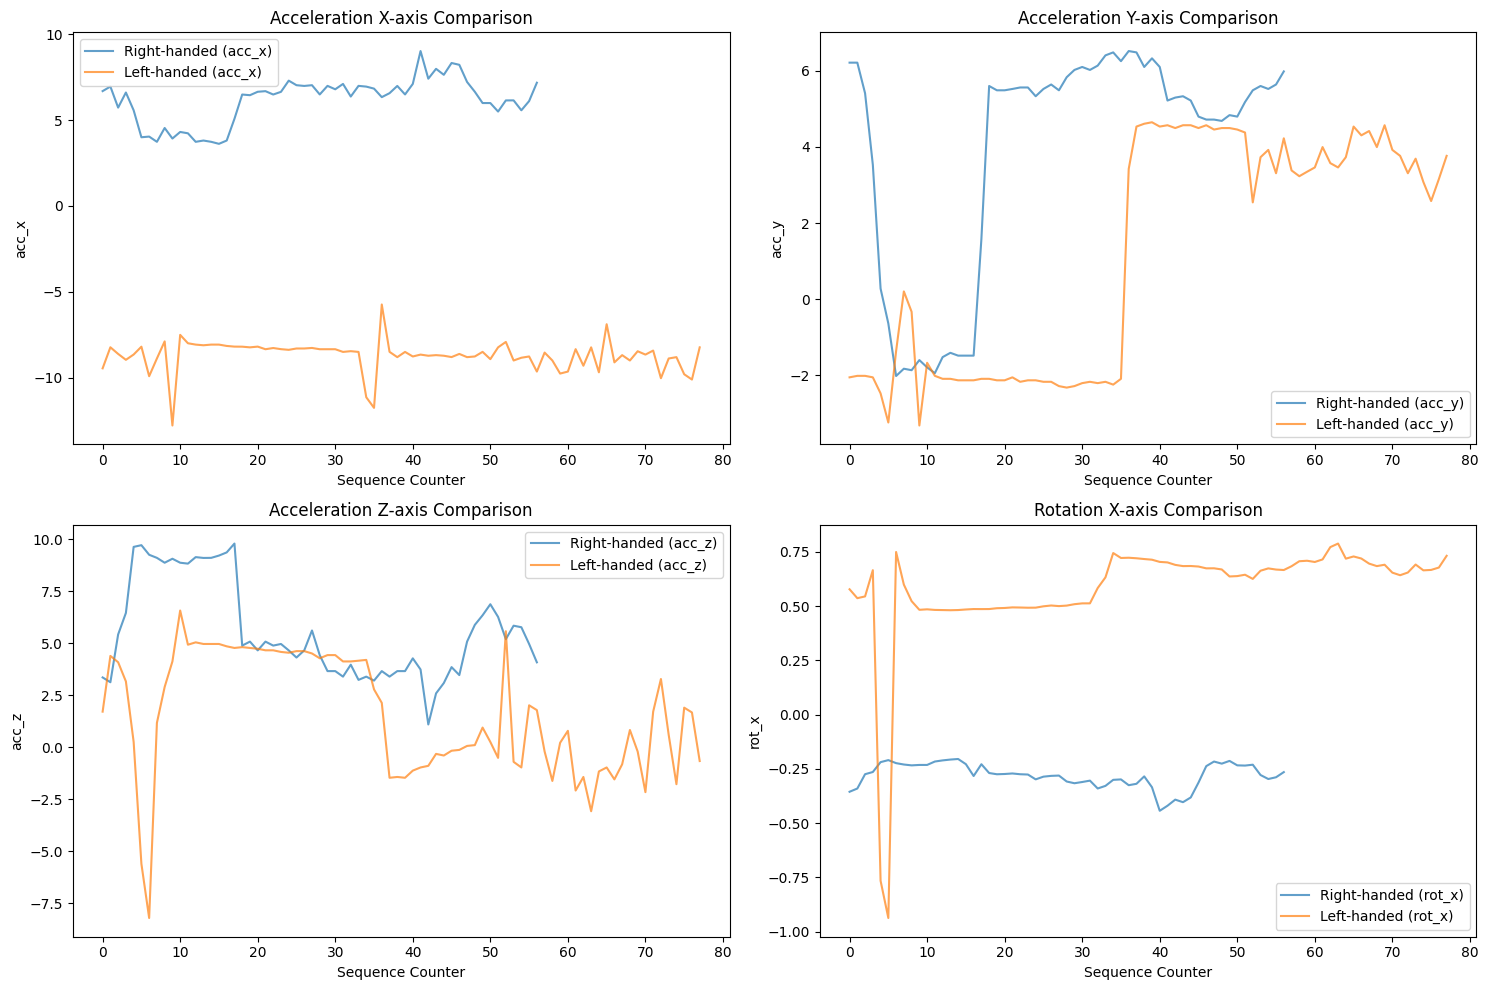

In [5]:
# Âà©„ÅçÊâã„Åî„Å®„ÅÆ„Çª„É≥„Çµ„Éº„Éá„Éº„ÇøÂèØË¶ñÂåñ
plt.figure(figsize=(15, 10))

# „Çµ„É≥„Éó„É´„Ç∑„Éº„ÇØ„Ç®„É≥„Çπ„ÇíÈÅ∏Êäû
right_handed_seq = train_with_handedness[train_with_handedness['handedness'] == 1]['sequence_id'].unique()[0]
left_handed_seq = train_with_handedness[train_with_handedness['handedness'] == 0]['sequence_id'].unique()[0]

# Âä†ÈÄüÂ∫¶„Éá„Éº„Çø„ÅÆÂèØË¶ñÂåñ
plt.subplot(2, 2, 1)
right_data = train_with_handedness[train_with_handedness['sequence_id'] == right_handed_seq]
left_data = train_with_handedness[train_with_handedness['sequence_id'] == left_handed_seq]

plt.plot(right_data['sequence_counter'], right_data['acc_x'], label='Right-handed (acc_x)', alpha=0.7)
plt.plot(left_data['sequence_counter'], left_data['acc_x'], label='Left-handed (acc_x)', alpha=0.7)
plt.title('Acceleration X-axis Comparison')
plt.xlabel('Sequence Counter')
plt.ylabel('acc_x')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(right_data['sequence_counter'], right_data['acc_y'], label='Right-handed (acc_y)', alpha=0.7)
plt.plot(left_data['sequence_counter'], left_data['acc_y'], label='Left-handed (acc_y)', alpha=0.7)
plt.title('Acceleration Y-axis Comparison')
plt.xlabel('Sequence Counter')
plt.ylabel('acc_y')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(right_data['sequence_counter'], right_data['acc_z'], label='Right-handed (acc_z)', alpha=0.7)
plt.plot(left_data['sequence_counter'], left_data['acc_z'], label='Left-handed (acc_z)', alpha=0.7)
plt.title('Acceleration Z-axis Comparison')
plt.xlabel('Sequence Counter')
plt.ylabel('acc_z')
plt.legend()

plt.subplot(2, 2, 4)
# „Ç∏„É£„Ç§„É≠„Çπ„Ç≥„Éº„Éó„Ç´„É©„É†„ÅåÂ≠òÂú®„Åó„Å™„ÅÑ„Åü„ÇÅ„ÄÅÂõûËª¢„Éá„Éº„Çø„Çí‰ΩøÁî®
plt.plot(right_data['sequence_counter'], right_data['rot_x'], label='Right-handed (rot_x)', alpha=0.7)
plt.plot(left_data['sequence_counter'], left_data['rot_x'], label='Left-handed (rot_x)', alpha=0.7)
plt.title('Rotation X-axis Comparison')
plt.xlabel('Sequence Counter')
plt.ylabel('rot_x')
plt.legend()

plt.tight_layout()
plt.show()

### Step3.2: Âà©„ÅçÊâãË£úÊ≠£„ÅÆÂÆüË£Ö

In [6]:
# „Çª„É´1ÔºöÂà©„ÅçÊâãË£úÊ≠£„ÅÆÈÅ©Áî®
# ------------------------------------------------------------
# ÂâçÊèêÔºötrain_with_handedness, test_with_handedness „ÅåÂÆöÁæ©Ê∏à„Åø
# handedness_correction() „Çí„Ç§„É≥„Éù„Éº„Éà„Åæ„Åü„ÅØÂêå‰∏Ä„Çª„É´ÂÜÖ„Å´ÂÆöÁæ©„Åó„Å¶„Åä„Åè
import sys
import os
sys.path.append('..')
from src.utils.preprocessing import handedness_correction
from src.utils.preprocessing import handedness_correction_v2
# „Çª„É´1ÔºöÊîπËâØÁâà Handedness Correction Èñ¢Êï∞ & ÈÅ©Áî®
import pandas as pd
# „Çª„É´2Ôºötrain/test „Å´ÂØæ„Åó„Å¶Ë£úÊ≠£ÔºÜÁµêÊûúÁ¢∫Ë™ç
train_corrected = (train_with_handedness)
train_corrected = handedness_correction_v2(train_with_handedness)
test_corrected  = handedness_correction_v2(test_with_handedness)


# „Çª„É≥„Çµ„Éº„Ç´„É©„É†Êï∞ÔºàÁ¢∫Ë™çÁî®Ôºâ
meta_cols = ['row_id','sequence_type','sequence_id','sequence_counter',
             'subject','orientation','behavior','phase','gesture','handedness']
sensor_cols = [c for c in train_corrected.columns if c not in meta_cols]
print(f"„Çª„É≥„Çµ„Éº„Ç´„É©„É†Êï∞: {len(sensor_cols)}")

print("Âà©„ÅçÊâãË£úÊ≠£_v2 ÂÆüË°åÂÆå‰∫Ü")
print(f"Train corrected shape: {train_corrected.shape}")
print(f"Test  corrected shape: {test_corrected.shape}")


„Çª„É≥„Çµ„Éº„Ç´„É©„É†Êï∞: 332
Âà©„ÅçÊâãË£úÊ≠£_v2 ÂÆüË°åÂÆå‰∫Ü
Train corrected shape: (574945, 342)
Test  corrected shape: (107, 337)


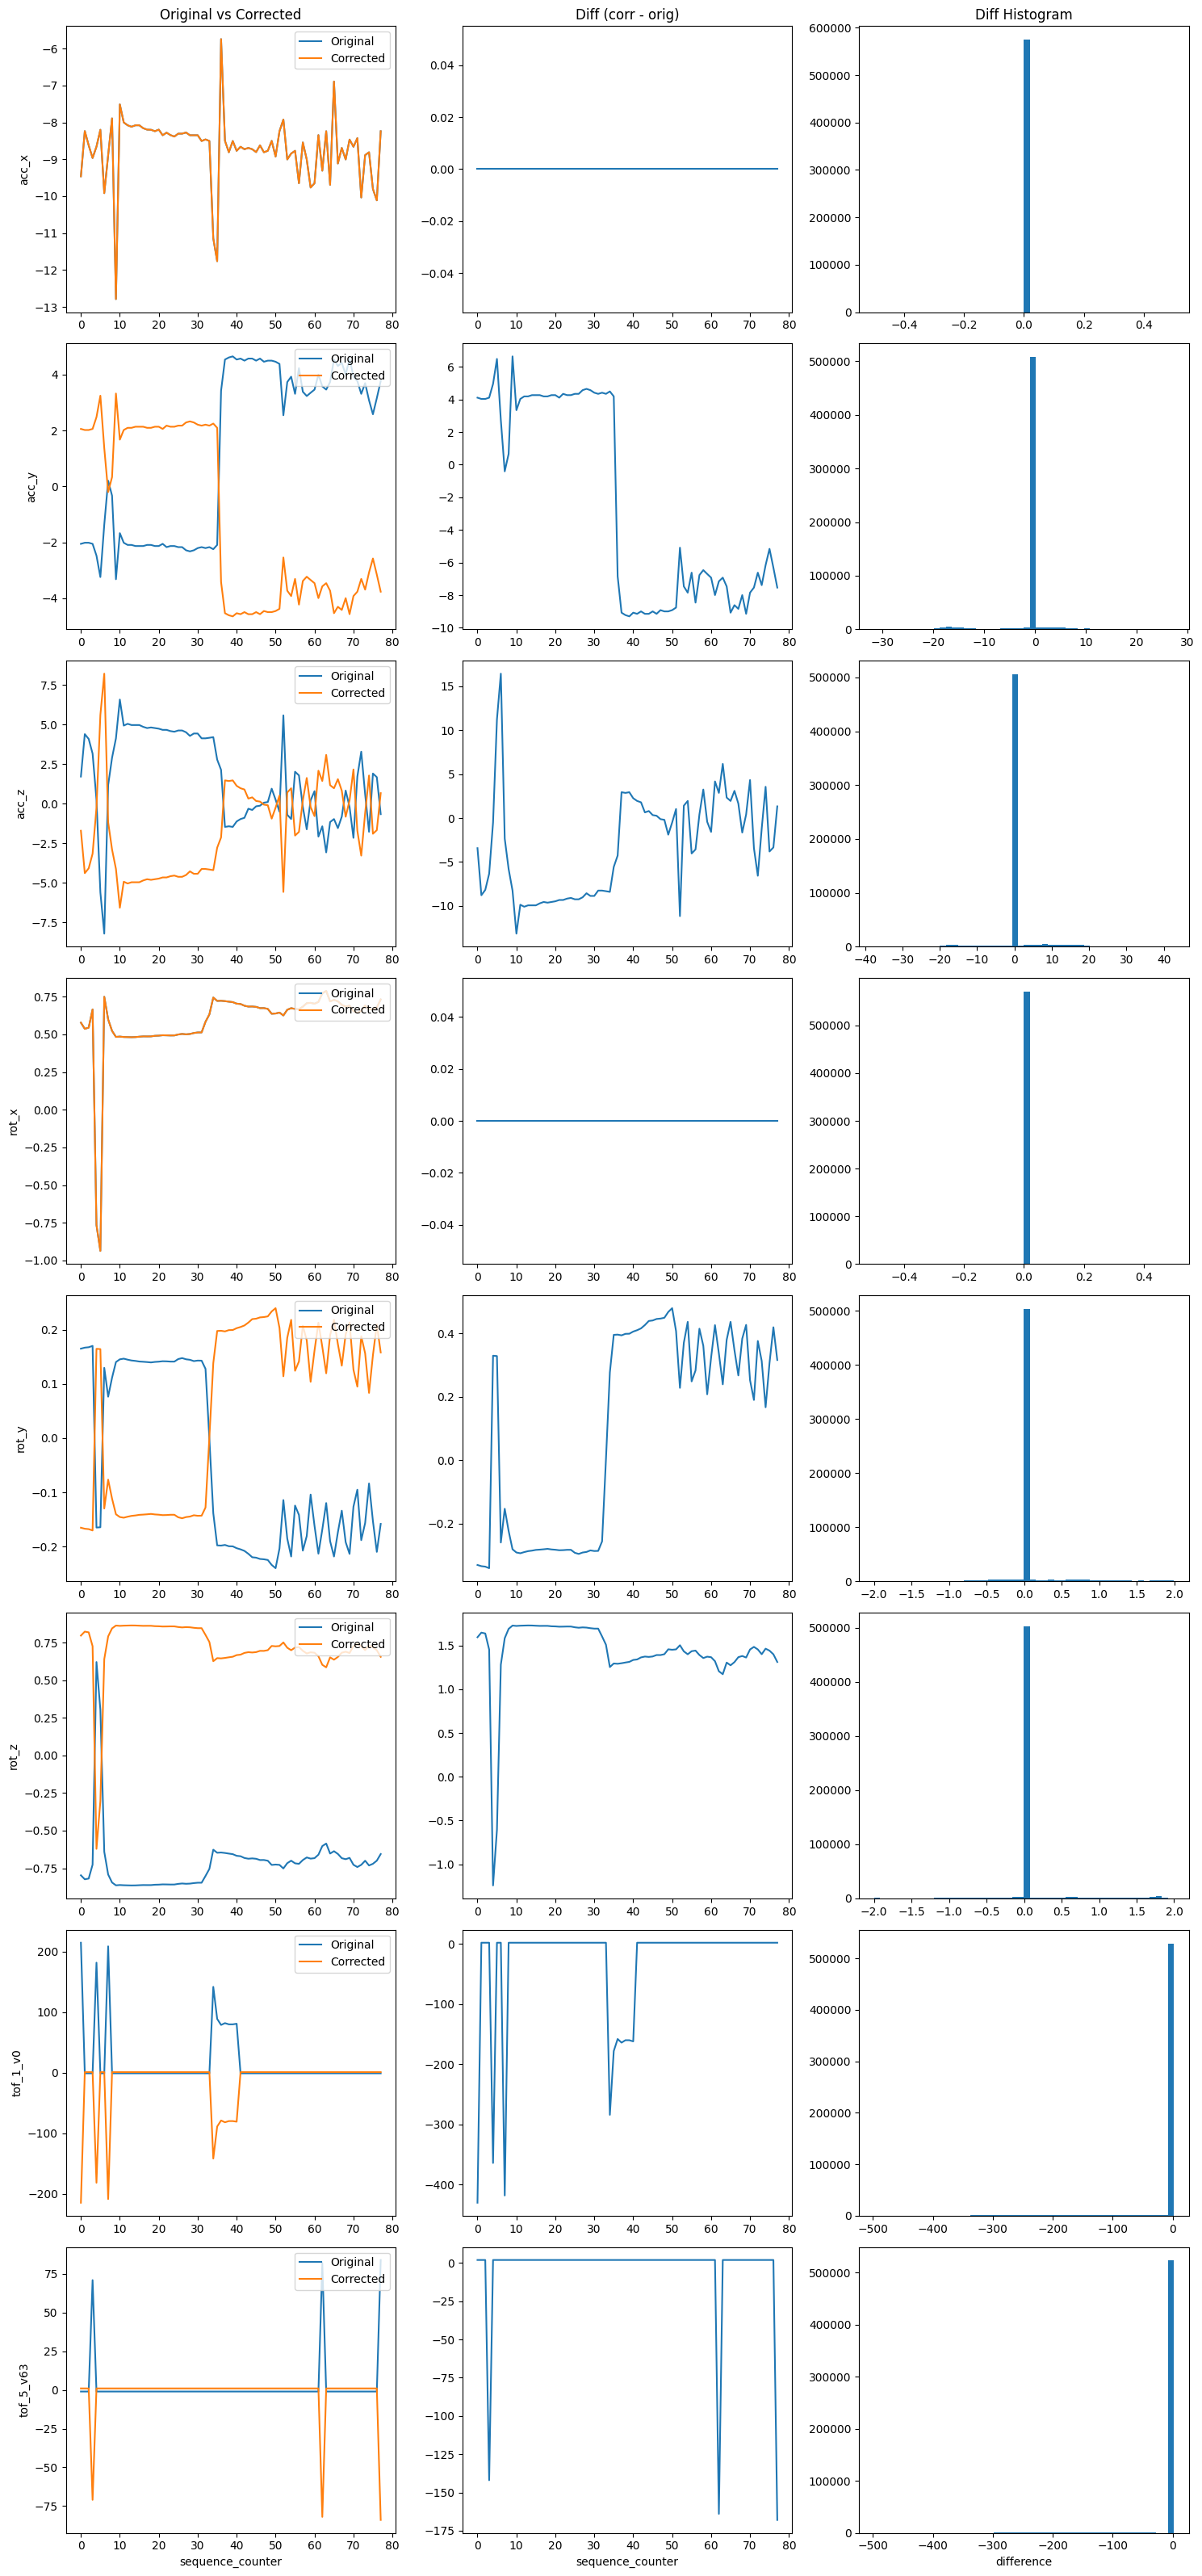

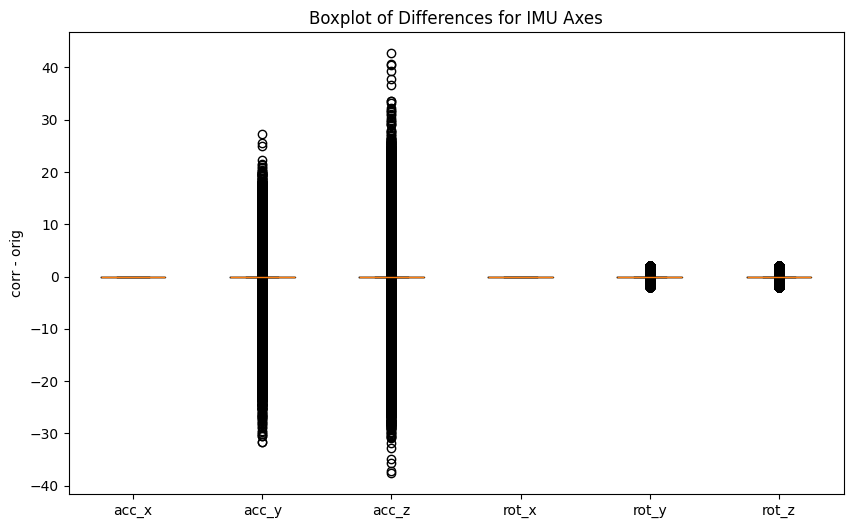

In [7]:
# „Çª„É´3ÔºöÂº∑Âåñ„Åó„ÅüÂèØË¶ñÂåñ
import matplotlib.pyplot as plt

# ‚îÄ‚îÄ 1) ÂèØË¶ñÂåñÂØæË±°„Ç´„É©„É†„ÅÆË®≠ÂÆö ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# IMUÁ≥ªÔºã‰ª£Ë°®ÁöÑ„Å™ToF„ÉÅ„É£„Éç„É´
cols_demo = [
    'acc_x','acc_y','acc_z',
    'rot_x','rot_y','rot_z',
    'tof_1_v0','tof_5_v63'
]

# ‚îÄ‚îÄ 2) Â∑ÆÂàÜ„Éá„Éº„ÇøÊ∫ñÂÇô ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# train_with_handedness, train_corrected „ÅØ‰∫ãÂâçÂÆöÁæ©Ê∏à„Åø„Å®„Åô„Çã
diff_df = train_corrected[cols_demo] - train_with_handedness[cols_demo]

# ‚îÄ‚îÄ 3) ‰æãÁ§∫„Ç∑„Éº„Ç±„É≥„Çπ„ÅÆÂèñÂæóÔºàÂ∑¶Âà©„Åç„ÅÆÊúÄÂàù„ÅÆ„Ç∑„Éº„Ç±„É≥„ÇπÔºâ ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
seq_id = train_with_handedness.loc[train_with_handedness['handedness']==0, 'sequence_id'].iloc[0]
orig_seq = train_with_handedness.query("sequence_id==@seq_id")
corr_seq = train_corrected.query("sequence_id==@seq_id")

# ‚îÄ‚îÄ 4) ÂéüÁ≥ªÂàó vs Ë£úÊ≠£Á≥ªÂàó ÔºÜ Â∑ÆÂàÜ ÔºÜ Â∑ÆÂàÜ„Éí„Çπ„Éà„Ç∞„É©„É† ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
n = len(cols_demo)
fig, axes = plt.subplots(n, 3, figsize=(15, 4*n))

for i, col in enumerate(cols_demo):
    # (a) Original vs Corrected
    axes[i,0].plot(orig_seq['sequence_counter'], orig_seq[col], label='Original')
    axes[i,0].plot(corr_seq['sequence_counter'], corr_seq[col], label='Corrected')
    if i==0: axes[i,0].set_title('Original vs Corrected')
    axes[i,0].set_ylabel(col)
    if i==n-1: axes[i,0].set_xlabel('sequence_counter')
    axes[i,0].legend(loc='upper right')

    # (b) Â∑ÆÂàÜ„Éó„É≠„ÉÉ„Éà
    diff_series = corr_seq[col].values - orig_seq[col].values
    axes[i,1].plot(orig_seq['sequence_counter'], diff_series)
    if i==0: axes[i,1].set_title('Diff (corr - orig)')
    if i==n-1: axes[i,1].set_xlabel('sequence_counter')

    # (c) Â∑ÆÂàÜ„Éí„Çπ„Éà„Ç∞„É©„É†
    axes[i,2].hist(diff_df[col].dropna(), bins=50)
    if i==0: axes[i,2].set_title('Diff Histogram')
    if i==n-1: axes[i,2].set_xlabel('difference')

fig.tight_layout()
plt.show()

# ‚îÄ‚îÄ 5) ÂÖ®IMUËª∏„ÅÆÂ∑ÆÂàÜÁÆ±„Å≤„ÅíÂõ≥ ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
imu_cols = ['acc_x','acc_y','acc_z','rot_x','rot_y','rot_z']
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot([diff_df[c].dropna() for c in imu_cols], labels=imu_cols)
ax.set_title('Boxplot of Differences for IMU Axes')
ax.set_ylabel('corr - orig')
plt.show()



## Step5: Ê¨†ÊêçÂÄ§„ÅÆÁ¢∫Ë™ç„Å®Âá¶ÁêÜ

=== Missing Values Analysis ===
Train missing values: 3597807
Test missing values: 0

=== Columns with Missing Values (Top 10) ===
thm_5        33286
tof_5_v63    30142
tof_5_v24    30142
tof_5_v18    30142
tof_5_v19    30142
tof_5_v20    30142
tof_5_v21    30142
tof_5_v22    30142
tof_5_v23    30142
tof_5_v25    30142
dtype: int64


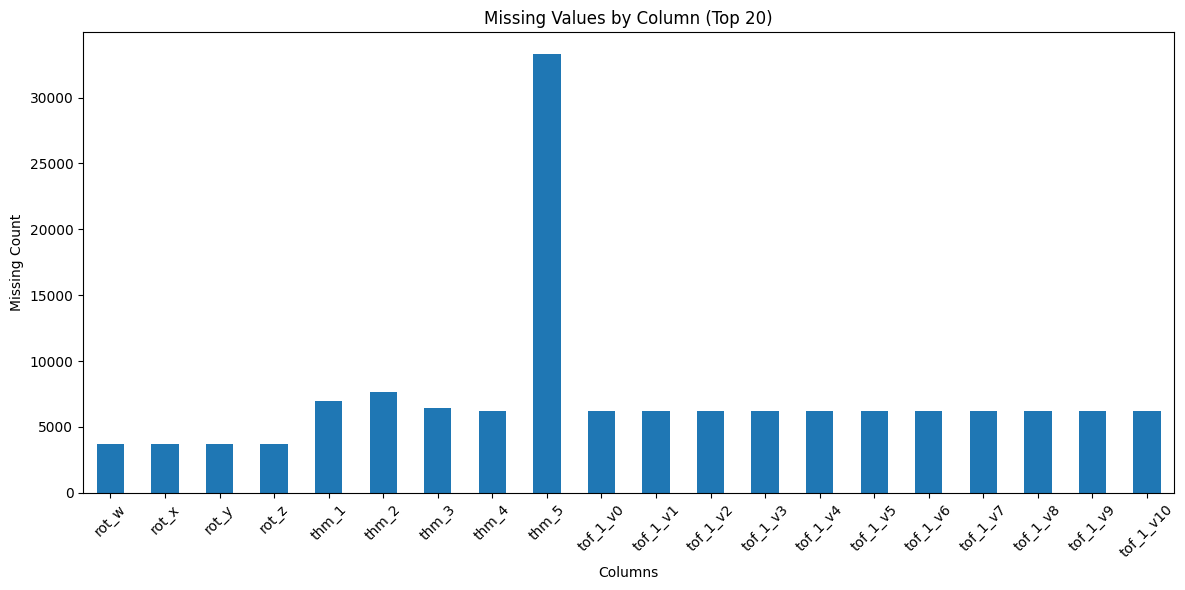

In [8]:
# Ê¨†ÊêçÂÄ§„ÅÆÁ¢∫Ë™ç# Âà©„ÅçÊâãÊÉÖÂ†±„ÅÆÁµêÂêà
print("=== Missing Values Analysis ===")
missing_train = train_corrected.isnull().sum()
missing_test = test_corrected.isnull().sum()

print(f"Train missing values: {missing_train.sum()}")
print(f"Test missing values: {missing_test.sum()}")

# Ê¨†ÊêçÂÄ§„ÅåÂ§ö„ÅÑ„Ç´„É©„É†„ÇíÁ¢∫Ë™ç
print("\n=== Columns with Missing Values (Top 10) ===")
missing_cols = missing_train[missing_train > 0].sort_values(ascending=False)
print(missing_cols.head(10))

# Ê¨†ÊêçÂÄ§„ÅÆÂèØË¶ñÂåñ
plt.figure(figsize=(12, 6))
missing_train[missing_train > 0].head(20).plot(kind='bar')
plt.title('Missing Values by Column (Top 20)')
plt.xlabel('Columns')
plt.ylabel('Missing Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Step4.5: ÁâπÂæ¥Èáè„Åî„Å®„ÅÆÊ¨†ÊêçÂÄ§„Éë„Çø„Éº„É≥Ë©≥Á¥∞Ë™øÊüª

ÂêÑ„Çª„É≥„Çµ„Éº„ÅÆÁâπÊÄß„Å´Âøú„Åò„ÅüÊ¨†ÊêçÂÄ§„ÅÆÁ®ÆÈ°û„Å®Ë°®ÁèæÊñπÊ≥ï„ÇíË©≥„Åó„ÅèË™øÊüª„Åó„Åæ„Åô„ÄÇ


In [9]:
# ÁâπÂæ¥Èáè„Åî„Å®„ÅÆÊ¨†ÊêçÂÄ§„Éë„Çø„Éº„É≥Ë©≥Á¥∞Ë™øÊüª

def analyze_missing_patterns(df, sensor_type_groups):
    """
    ÂêÑ„Çª„É≥„Çµ„Éº„Çø„Ç§„Éó„ÅÆÊ¨†ÊêçÂÄ§„Éë„Çø„Éº„É≥„ÇíË©≥Á¥∞„Å´Ë™øÊüª„Åô„ÇãÈñ¢Êï∞
    """
    print(f"=== ÁâπÂæ¥Èáè„Åî„Å®„ÅÆÊ¨†ÊêçÂÄ§„Éë„Çø„Éº„É≥ÂàÜÊûê ===")
    print(f"„Éá„Éº„Çø„Çµ„Ç§„Ç∫: {df.shape}")
    print()
    
    missing_analysis = {}
    
    for sensor_type, columns in sensor_type_groups.items():
        print(f"üîç {sensor_type} „Çª„É≥„Çµ„Éº„ÅÆÂàÜÊûê")
        print(f"„Ç´„É©„É†Êï∞: {len(columns)}")
        
        # ÂêÑ„Ç´„É©„É†„ÅÆÊ¨†ÊêçÂÄ§„Éë„Çø„Éº„É≥
        sensor_data = df[columns]
        
        # 1. NULLÂÄ§„ÅÆÁ¢∫Ë™ç
        null_counts = sensor_data.isnull().sum()
        print(f"  NULLÂÄ§:")
        null_with_values = null_counts[null_counts > 0]
        if len(null_with_values) > 0:
            print(f"    Ê¨†Êêç„Åå„ÅÇ„Çã„Ç´„É©„É†: {len(null_with_values)}/{len(columns)}")
            print(f"    ÊúÄÂ§öÊ¨†Êêç: {null_with_values.max():,} ({null_with_values.idxmax()})")
            print(f"    ÊúÄÂ∞ëÊ¨†Êêç: {null_with_values.min():,} ({null_with_values.idxmin()})")
        else:
            print(f"    NULLÂÄ§„Å™„Åó")
        
        # 2. ÁâπÊÆäÂÄ§„ÅÆÁ¢∫Ë™çÔºà-1, 0, Áï∞Â∏∏ÂÄ§„Å™„Å©Ôºâ
        print(f"  ÁâπÊÆäÂÄ§„ÅÆË™øÊüª:")
        
        # -1„ÅÆÂÄãÊï∞
        minus_one_counts = (sensor_data == -1).sum()
        if minus_one_counts.sum() > 0:
            print(f"    -1„ÅÆÂÄ§: {minus_one_counts.sum():,} ÂÄã")
            top_minus_one = minus_one_counts[minus_one_counts > 0].head(3)
            for col, count in top_minus_one.items():
                print(f"      {col}: {count:,}")
        
        # 0„ÅÆÂÄãÊï∞Ôºà„Çª„É≥„Çµ„Éº„Å´„Çà„Å£„Å¶„ÅØÁÑ°ÂäπÂÄ§Ôºâ
        zero_counts = (sensor_data == 0).sum()
        if zero_counts.sum() > 0:
            print(f"    0„ÅÆÂÄ§: {zero_counts.sum():,} ÂÄã")
            top_zero = zero_counts[zero_counts > 0].head(3)
            for col, count in top_zero.items():
                print(f"      {col}: {count:,}")
        
        # 3. ÂêÑ„Ç´„É©„É†„ÅÆÂÄ§„ÅÆÂàÜÂ∏É„ÇíÁ¢∫Ë™ç
        print(f"  ÂÄ§„ÅÆÂàÜÂ∏É:")
        for col in columns[:5]:  # ÊúÄÂàù„ÅÆ2„Ç´„É©„É†„ÅÆ„ÅøË°®Á§∫
            col_data = sensor_data[col].dropna()
            if len(col_data) > 0:
                print(f"    {col}:")
                print(f"      ÁØÑÂõ≤: [{col_data.min():.3f}, {col_data.max():.3f}]")
                print(f"      Âπ≥Âùá: {col_data.mean():.3f}, Ê®ôÊ∫ñÂÅèÂ∑Æ: {col_data.std():.3f}")
                
                # Áï∞Â∏∏ÂÄ§„ÅÆÊ§úÂá∫ÔºàIQRÊ≥ïÔºâ
                Q1 = col_data.quantile(0.25)
                Q3 = col_data.quantile(0.75)
                IQR = Q3 - Q1
                lower_bound = Q1 - 1.5 * IQR
                upper_bound = Q3 + 1.5 * IQR
                outliers = col_data[(col_data < lower_bound) | (col_data > upper_bound)]
                print(f"      Áï∞Â∏∏ÂÄ§: {len(outliers)} ÂÄã ({len(outliers)/len(col_data)*100:.1f}%)")
        
        # 4. Ê¨†ÊêçÂÄ§„ÅÆÊôÇÁ≥ªÂàó„Éë„Çø„Éº„É≥
        print(f"  ÊôÇÁ≥ªÂàó„Éë„Çø„Éº„É≥:")
        sample_seq = df['sequence_id'].unique()[0]
        sample_data = df[df['sequence_id'] == sample_seq][columns]
        
        total_missing_per_timestamp = sample_data.isnull().sum(axis=1)
        if total_missing_per_timestamp.sum() > 0:
            print(f"    „Çµ„É≥„Éó„É´„Ç∑„Éº„Ç±„É≥„Çπ({sample_seq})„ÅÆÊ¨†Êêç„Éë„Çø„Éº„É≥:")
            print(f"      Ê¨†Êêç„Åå„ÅÇ„Çã„Çø„Ç§„É†„Çπ„Çø„É≥„Éó: {(total_missing_per_timestamp > 0).sum()}/{len(sample_data)}")
            print(f"      ÊúÄÂ§ßÂêåÊôÇÊ¨†Êêç„Ç´„É©„É†Êï∞: {total_missing_per_timestamp.max()}")
        else:
            print(f"    „Çµ„É≥„Éó„É´„Ç∑„Éº„Ç±„É≥„Çπ({sample_seq})„Å´Ê¨†Êêç„Å™„Åó")
        
        missing_analysis[sensor_type] = {
            'null_counts': null_counts,
            'minus_one_counts': minus_one_counts,
            'zero_counts': zero_counts,
            'total_columns': len(columns)
        }
        
        print()
    
    return missing_analysis

# „Çª„É≥„Çµ„Éº„Çø„Ç§„ÉóÂà•„Å´„Ç´„É©„É†„Çí„Ç∞„É´„Éº„ÉóÂåñ
sensor_type_groups = {
    'Accelerometer': [col for col in train_corrected.columns if 'acc_' in col],
    'Rotation': [col for col in train_corrected.columns if 'rot_' in col],
    'ToF_Sensor': [col for col in train_corrected.columns if 'tof_' in col],
    'Thermal': [col for col in train_corrected.columns if 'thm_' in col]
}
print(sensor_type_groups)

print("„Çª„É≥„Çµ„Éº„Çø„Ç§„ÉóÂà•„Ç´„É©„É†Êï∞:")
for sensor_type, columns in sensor_type_groups.items():
    print(f"  {sensor_type}: {len(columns)} „Ç´„É©„É†")
print()

# Ë©≥Á¥∞ÂàÜÊûê„ÇíÂÆüË°å
missing_analysis = analyze_missing_patterns(train_corrected, sensor_type_groups)


{'Accelerometer': ['acc_x', 'acc_y', 'acc_z'], 'Rotation': ['rot_w', 'rot_x', 'rot_y', 'rot_z'], 'ToF_Sensor': ['tof_1_v0', 'tof_1_v1', 'tof_1_v2', 'tof_1_v3', 'tof_1_v4', 'tof_1_v5', 'tof_1_v6', 'tof_1_v7', 'tof_1_v8', 'tof_1_v9', 'tof_1_v10', 'tof_1_v11', 'tof_1_v12', 'tof_1_v13', 'tof_1_v14', 'tof_1_v15', 'tof_1_v16', 'tof_1_v17', 'tof_1_v18', 'tof_1_v19', 'tof_1_v20', 'tof_1_v21', 'tof_1_v22', 'tof_1_v23', 'tof_1_v24', 'tof_1_v25', 'tof_1_v26', 'tof_1_v27', 'tof_1_v28', 'tof_1_v29', 'tof_1_v30', 'tof_1_v31', 'tof_1_v32', 'tof_1_v33', 'tof_1_v34', 'tof_1_v35', 'tof_1_v36', 'tof_1_v37', 'tof_1_v38', 'tof_1_v39', 'tof_1_v40', 'tof_1_v41', 'tof_1_v42', 'tof_1_v43', 'tof_1_v44', 'tof_1_v45', 'tof_1_v46', 'tof_1_v47', 'tof_1_v48', 'tof_1_v49', 'tof_1_v50', 'tof_1_v51', 'tof_1_v52', 'tof_1_v53', 'tof_1_v54', 'tof_1_v55', 'tof_1_v56', 'tof_1_v57', 'tof_1_v58', 'tof_1_v59', 'tof_1_v60', 'tof_1_v61', 'tof_1_v62', 'tof_1_v63', 'tof_2_v0', 'tof_2_v1', 'tof_2_v2', 'tof_2_v3', 'tof_2_v4', 'tof_2

## Step4.6: ‰øÆÊ≠£„Åï„Çå„ÅüÊ¨†ÊêçÂÄ§Âá¶ÁêÜ„ÅÆÂÆüË£Ö

Ë™øÊüªÁµêÊûú„Å´Âü∫„Å•„ÅÑ„Å¶„ÄÅ„Çª„É≥„Çµ„Éº„Çø„Ç§„Éó„Åî„Å®„ÅÆÈÅ©Âàá„Å™Ê¨†ÊêçÂÄ§Âá¶ÁêÜ„ÇíÂÆüË£Ö„Åó„Åæ„Åô„ÄÇ

### Âá¶ÁêÜÊñπÈáù
- **Accelerometer**: Áï∞Â∏∏ÂÄ§Ôºà-1, 0Ôºâ„ÇíNaN„Å´Â§âÊèõ
- **Rotation**: null„ÅÆ„ÅøÊ¨†ÊêçÂÄ§„Å®„Åó„Å¶Êâ±„ÅÜ
- **ToF_Sensor**: null„Å®-1„ÇíÊ¨†ÊêçÂÄ§„Å®„Åó„Å¶Êâ±„ÅÜ
- **Thermal**: null„ÅÆ„ÅøÊ¨†ÊêçÂÄ§„Å®„Åó„Å¶Êâ±„ÅÜ


In [10]:
import sys
import os
sys.path.append('..')

# Êñ∞„Åó„ÅÑÊ¨†ÊêçÂÄ§Âá¶ÁêÜÈñ¢Êï∞„Çí„Ç§„É≥„Éù„Éº„Éà
from src.utils.preprocessing import clean_sensor_missing_values

# Âá¶ÁêÜÂâç„ÅÆ„Éá„Éº„ÇøÁµ±Ë®à„ÇíË®òÈå≤
print("=== Âá¶ÁêÜÂâç„ÅÆ„Éá„Éº„ÇøÁµ±Ë®à ===")
sensor_cols = [col for col in train_corrected.columns if any(sensor in col for sensor in ['acc_', 'rot_', 'tof_', 'thm_'])]

original_stats = {}
for sensor_type, columns in sensor_type_groups.items():
    existing_cols = [col for col in columns if col in train_corrected.columns]
    if existing_cols:
        null_count = train_corrected[existing_cols].isnull().sum().sum()
        minus_one_count = (train_corrected[existing_cols] == -1).sum().sum()
        zero_count = (train_corrected[existing_cols] == 0).sum().sum()
        
        original_stats[sensor_type] = {
            'null': null_count,
            'minus_one': minus_one_count,
            'zero': zero_count
        }
        
        print(f"{sensor_type}:")
        print(f"  NULLÂÄ§: {null_count:,}")
        print(f"  -1ÂÄ§: {minus_one_count:,}")
        print(f"  0ÂÄ§: {zero_count:,}")

print(f"\nÂÖ®‰Ωì„ÅÆÁµ±Ë®à:")
print(f"  Á∑èNULLÂÄ§: {train_corrected[sensor_cols].isnull().sum().sum():,}")
print(f"  Á∑è-1ÂÄ§: {(train_corrected[sensor_cols] == -1).sum().sum():,}")
print(f"  Á∑è0ÂÄ§: {(train_corrected[sensor_cols] == 0).sum().sum():,}")

# ‰øÆÊ≠£„Åï„Çå„ÅüÊ¨†ÊêçÂÄ§Âá¶ÁêÜ„ÇíÂÆüË°å
print("\n=== ‰øÆÊ≠£„Åï„Çå„ÅüÊ¨†ÊêçÂÄ§Âá¶ÁêÜ„ÇíÂÆüË°å ===")
train_cleaned_new = clean_sensor_missing_values(train_corrected, sensor_type_groups)
test_cleaned_new = clean_sensor_missing_values(test_corrected, sensor_type_groups)

# Âá¶ÁêÜÂæå„ÅÆ„Éá„Éº„ÇøÁµ±Ë®à„ÇíË®òÈå≤
print("\n=== Âá¶ÁêÜÂæå„ÅÆ„Éá„Éº„ÇøÁµ±Ë®à ===")
processed_stats = {}
for sensor_type, columns in sensor_type_groups.items():
    existing_cols = [col for col in columns if col in train_cleaned_new.columns]
    if existing_cols:
        null_count = train_cleaned_new[existing_cols].isnull().sum().sum()
        minus_one_count = (train_cleaned_new[existing_cols] == -1).sum().sum()
        zero_count = (train_cleaned_new[existing_cols] == 0).sum().sum()
        
        processed_stats[sensor_type] = {
            'null': null_count,
            'minus_one': minus_one_count,
            'zero': zero_count
        }
        
        print(f"{sensor_type}:")
        print(f"  NULLÂÄ§: {null_count:,} (Â§âÂåñ: {null_count - original_stats[sensor_type]['null']:+,})")
        print(f"  -1ÂÄ§: {minus_one_count:,} (Â§âÂåñ: {minus_one_count - original_stats[sensor_type]['minus_one']:+,})")
        print(f"  0ÂÄ§: {zero_count:,} (Â§âÂåñ: {zero_count - original_stats[sensor_type]['zero']:+,})")

print(f"\nÂÖ®‰Ωì„ÅÆÁµ±Ë®à:")
total_null_after = train_cleaned_new[sensor_cols].isnull().sum().sum()
total_minus_one_after = (train_cleaned_new[sensor_cols] == -1).sum().sum()
total_zero_after = (train_cleaned_new[sensor_cols] == 0).sum().sum()

print(f"  Á∑èNULLÂÄ§: {total_null_after:,} (Â§âÂåñ: {total_null_after - train_corrected[sensor_cols].isnull().sum().sum():+,})")
print(f"  Á∑è-1ÂÄ§: {total_minus_one_after:,} (Â§âÂåñ: {total_minus_one_after - (train_corrected[sensor_cols] == -1).sum().sum():+,})")
print(f"  Á∑è0ÂÄ§: {total_zero_after:,} (Â§âÂåñ: {total_zero_after - (train_corrected[sensor_cols] == 0).sum().sum():+,})")

print("\n‚úÖ ‰øÆÊ≠£„Åï„Çå„ÅüÊ¨†ÊêçÂÄ§Âá¶ÁêÜ„ÅåÂÆå‰∫Ü„Åó„Åæ„Åó„ÅüÔºÅ")


=== Âá¶ÁêÜÂâç„ÅÆ„Éá„Éº„ÇøÁµ±Ë®à ===
Accelerometer:
  NULLÂÄ§: 0
  -1ÂÄ§: 335
  0ÂÄ§: 441
Rotation:
  NULLÂÄ§: 14,768
  -1ÂÄ§: 0
  0ÂÄ§: 97
ToF_Sensor:
  NULLÂÄ§: 3,522,432
  -1ÂÄ§: 92,753,358
  0ÂÄ§: 970,109
Thermal:
  NULLÂÄ§: 60,607
  -1ÂÄ§: 0
  0ÂÄ§: 8,307

ÂÖ®‰Ωì„ÅÆÁµ±Ë®à:
  Á∑èNULLÂÄ§: 3,597,807
  Á∑è-1ÂÄ§: 92,753,693
  Á∑è0ÂÄ§: 978,954

=== ‰øÆÊ≠£„Åï„Çå„ÅüÊ¨†ÊêçÂÄ§Âá¶ÁêÜ„ÇíÂÆüË°å ===

=== Âá¶ÁêÜÂæå„ÅÆ„Éá„Éº„ÇøÁµ±Ë®à ===
Accelerometer:
  NULLÂÄ§: 3 (Â§âÂåñ: +3)
  -1ÂÄ§: 335 (Â§âÂåñ: +0)
  0ÂÄ§: 441 (Â§âÂåñ: +0)
Rotation:
  NULLÂÄ§: 14,768 (Â§âÂåñ: +0)
  -1ÂÄ§: 0 (Â§âÂåñ: +0)
  0ÂÄ§: 97 (Â§âÂåñ: +0)
ToF_Sensor:
  NULLÂÄ§: 96,275,790 (Â§âÂåñ: +92,753,358)
  -1ÂÄ§: 0 (Â§âÂåñ: -92,753,358)
  0ÂÄ§: 970,109 (Â§âÂåñ: +0)
Thermal:
  NULLÂÄ§: 60,607 (Â§âÂåñ: +0)
  -1ÂÄ§: 0 (Â§âÂåñ: +0)
  0ÂÄ§: 8,307 (Â§âÂåñ: +0)

ÂÖ®‰Ωì„ÅÆÁµ±Ë®à:
  Á∑èNULLÂÄ§: 96,351,168 (Â§âÂåñ: +92,753,361)
  Á∑è-1ÂÄ§: 335 (Â§âÂåñ: -92,753,358)
  Á∑è0ÂÄ§: 978,954 (Â§âÂåñ: +0)

‚úÖ ‰øÆÊ≠£„Åï„Çå„ÅüÊ¨†ÊêçÂÄ§Âá¶ÁêÜ„ÅåÂÆå‰∫Ü„

=== ‰øÆÊ≠£„Åï„Çå„ÅüÊ¨†ÊêçÂÄ§Âá¶ÁêÜ„ÅÆË©≥Á¥∞ÂàÜÊûê ===


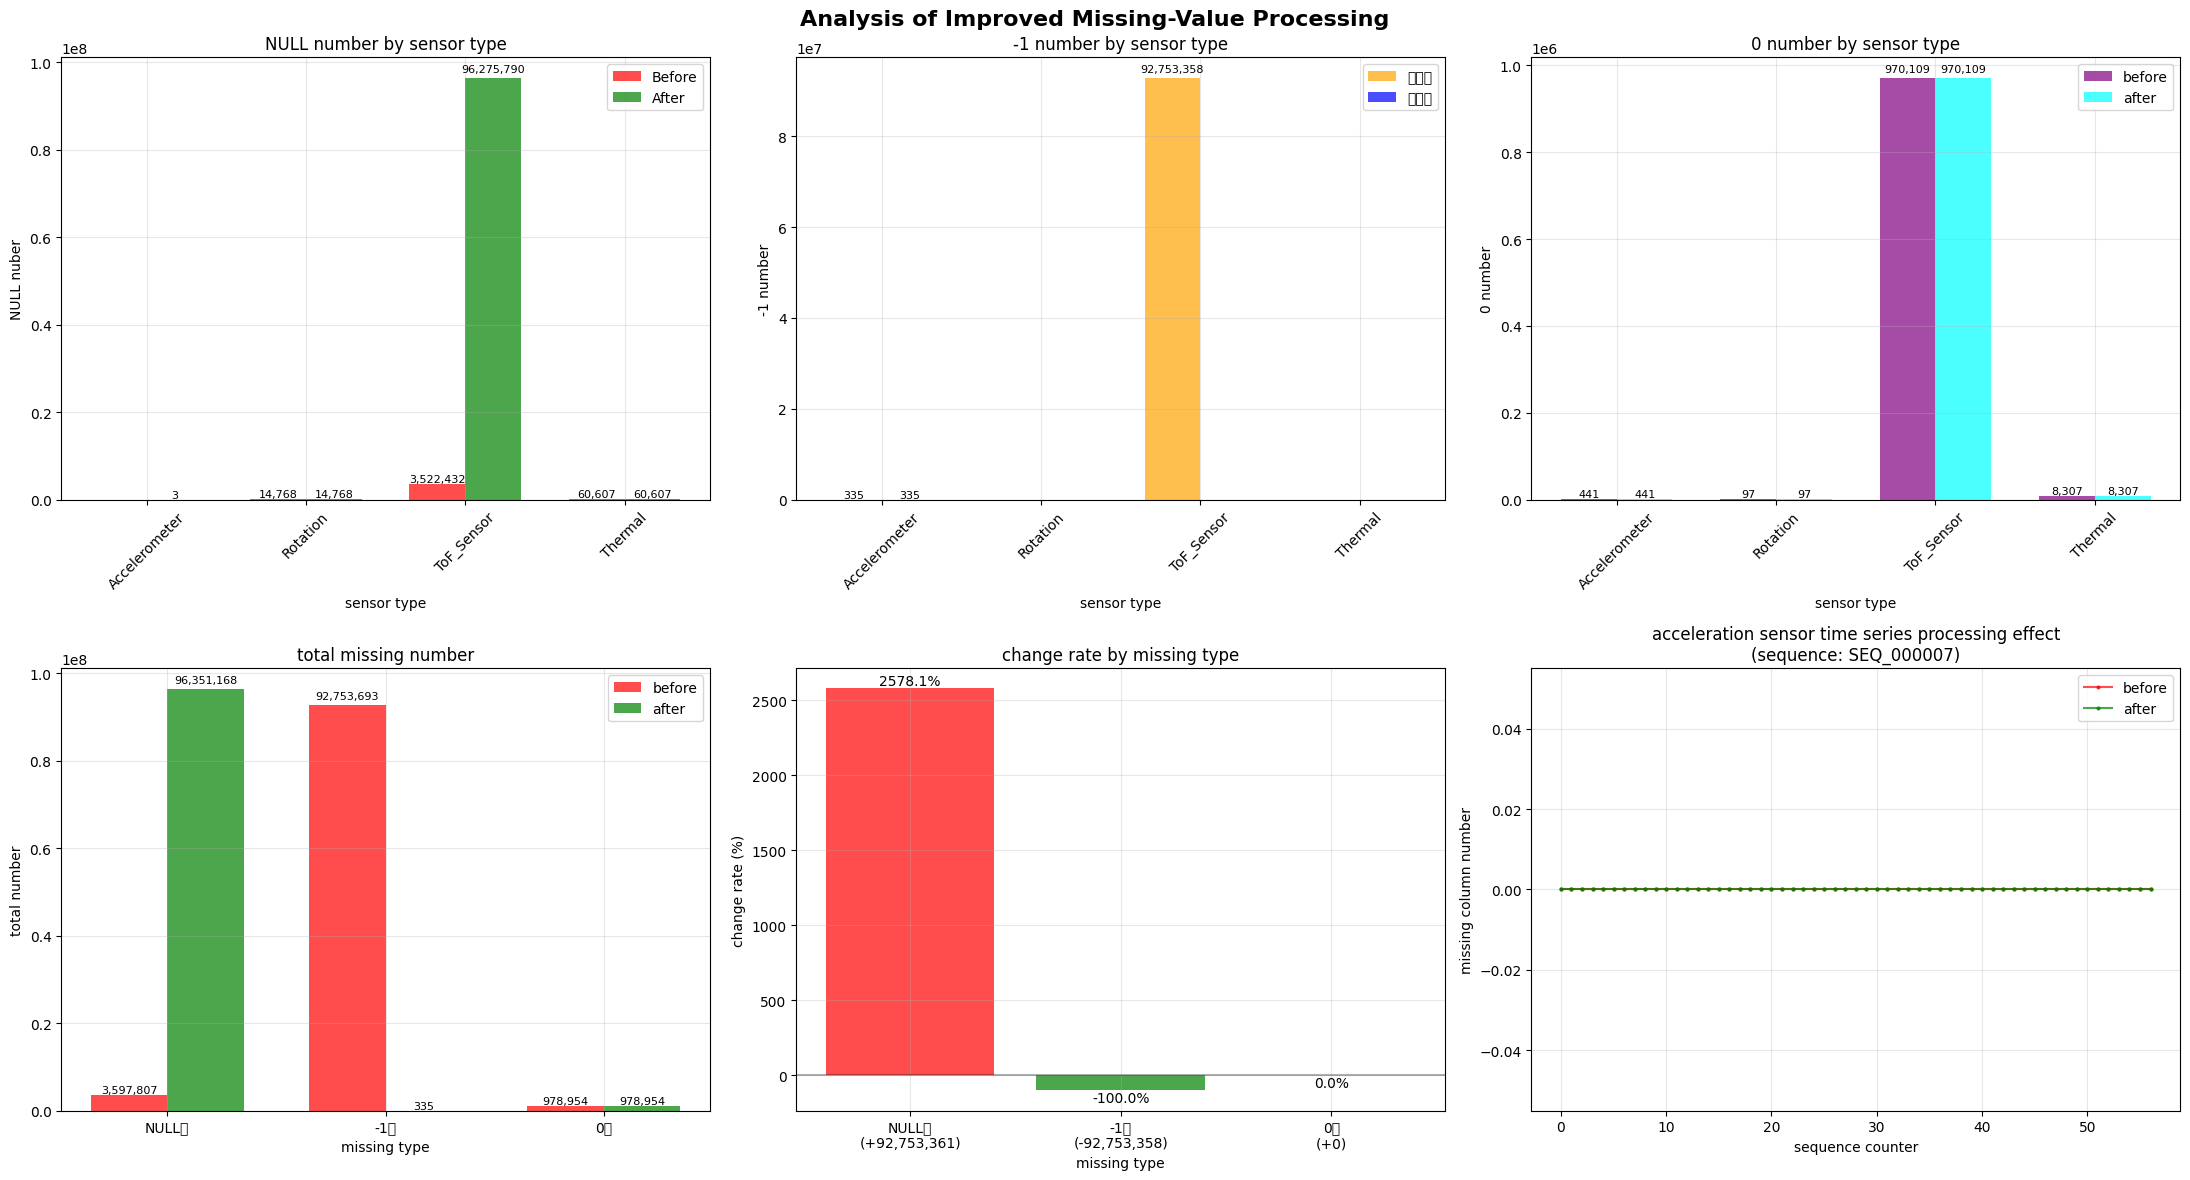

In [11]:
# ‰øÆÊ≠£„Åï„Çå„ÅüÊ¨†ÊêçÂÄ§Âá¶ÁêÜ„ÅÆË©≥Á¥∞ÂàÜÊûê„Å®ÂèØË¶ñÂåñ

def analyze_improved_missing_processing(original_df, processed_df, sensor_type_groups):
    """
    ‰øÆÊ≠£„Åï„Çå„ÅüÊ¨†ÊêçÂÄ§Âá¶ÁêÜ„ÅÆÂäπÊûú„ÇíË©≥Á¥∞„Å´ÂàÜÊûê„Åô„ÇãÈñ¢Êï∞
    """
    fig, axes = plt.subplots(2, 3, figsize=(22, 12))
    fig.suptitle('Analysis of Improved Missing-Value Processing', fontsize=16, fontweight='bold')
    
    # 1. „Çª„É≥„Çµ„Éº„Çø„Ç§„ÉóÂà•„ÅÆÂá¶ÁêÜÂäπÊûú
    ax1 = axes[0, 0]
    sensor_types = list(sensor_type_groups.keys())
    
    # Âá¶ÁêÜÂâçÂæå„ÅÆNULLÂÄ§Êï∞„ÇíÊØîËºÉ
    null_before = []
    null_after = []
    for sensor_type in sensor_types:
        columns = [col for col in sensor_type_groups[sensor_type] if col in original_df.columns]
        if columns:
            null_before.append(original_df[columns].isnull().sum().sum())
            null_after.append(processed_df[columns].isnull().sum().sum())
        else:
            null_before.append(0)
            null_after.append(0)
    
    x = np.arange(len(sensor_types))
    width = 0.35
    
    bars1 = ax1.bar(x - width/2, null_before, width, label='Before', color='red', alpha=0.7)
    bars2 = ax1.bar(x + width/2, null_after, width, label='After', color='green', alpha=0.7)
    
    ax1.set_xlabel('sensor type')
    ax1.set_ylabel('NULL nuber')
    ax1.set_title('NULL number by sensor type')
    ax1.set_xticks(x)
    ax1.set_xticklabels(sensor_types, rotation=45)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # ÂÄ§„Çí„Éê„Éº„ÅÆ‰∏ä„Å´Ë°®Á§∫
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            if height > 0:
                ax1.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                        f'{int(height):,}', ha='center', va='bottom', fontsize=8)
    
    # 2. ÁâπÊÆäÂÄ§„ÅÆÂá¶ÁêÜÂäπÊûú
    ax2 = axes[0, 1]
    
    # -1ÂÄ§„ÅÆÂá¶ÁêÜÂäπÊûú
    minus_one_before = []
    minus_one_after = []
    for sensor_type in sensor_types:
        columns = [col for col in sensor_type_groups[sensor_type] if col in original_df.columns]
        if columns:
            minus_one_before.append((original_df[columns] == -1).sum().sum())
            minus_one_after.append((processed_df[columns] == -1).sum().sum())
        else:
            minus_one_before.append(0)
            minus_one_after.append(0)
    
    bars1 = ax2.bar(x - width/2, minus_one_before, width, label='Âá¶ÁêÜÂâç', color='orange', alpha=0.7)
    bars2 = ax2.bar(x + width/2, minus_one_after, width, label='Âá¶ÁêÜÂæå', color='blue', alpha=0.7)
    
    ax2.set_xlabel('sensor type')
    ax2.set_ylabel('-1 number')
    ax2.set_title('-1 number by sensor type')
    ax2.set_xticks(x)
    ax2.set_xticklabels(sensor_types, rotation=45)
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # ÂÄ§„Çí„Éê„Éº„ÅÆ‰∏ä„Å´Ë°®Á§∫
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            if height > 0:
                ax2.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                        f'{int(height):,}', ha='center', va='bottom', fontsize=8)
    
    # 3. 0ÂÄ§„ÅÆÂá¶ÁêÜÂäπÊûú
    ax3 = axes[0, 2]
    
    # 0ÂÄ§„ÅÆÂá¶ÁêÜÂäπÊûú
    zero_before = []
    zero_after = []
    for sensor_type in sensor_types:
        columns = [col for col in sensor_type_groups[sensor_type] if col in original_df.columns]
        if columns:
            zero_before.append((original_df[columns] == 0).sum().sum())
            zero_after.append((processed_df[columns] == 0).sum().sum())
        else:
            zero_before.append(0)
            zero_after.append(0)
    
    bars1 = ax3.bar(x - width/2, zero_before, width, label='before', color='purple', alpha=0.7)
    bars2 = ax3.bar(x + width/2, zero_after, width, label='after', color='cyan', alpha=0.7)
    
    ax3.set_xlabel('sensor type')
    ax3.set_ylabel('0 number')
    ax3.set_title('0 number by sensor type')
    ax3.set_xticks(x)
    ax3.set_xticklabels(sensor_types, rotation=45)
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # ÂÄ§„Çí„Éê„Éº„ÅÆ‰∏ä„Å´Ë°®Á§∫
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            if height > 0:
                ax3.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                        f'{int(height):,}', ha='center', va='bottom', fontsize=8)
    
    # 4. ÂÖ®‰Ωì„ÅÆÂá¶ÁêÜÂäπÊûú„Çµ„Éû„É™„Éº
    ax4 = axes[1, 0]
    
    categories = ['NULLÂÄ§', '-1ÂÄ§', '0ÂÄ§']
    
    # ÂÖ®‰Ωì„ÅÆÁµ±Ë®à
    sensor_cols = [col for col in original_df.columns if any(sensor in col for sensor in ['acc_', 'rot_', 'tof_', 'thm_'])]
    
    total_before = [
        original_df[sensor_cols].isnull().sum().sum(),
        (original_df[sensor_cols] == -1).sum().sum(),
        (original_df[sensor_cols] == 0).sum().sum()
    ]
    
    total_after = [
        processed_df[sensor_cols].isnull().sum().sum(),
        (processed_df[sensor_cols] == -1).sum().sum(),
        (processed_df[sensor_cols] == 0).sum().sum()
    ]
    
    x_cat = np.arange(len(categories))
    
    bars1 = ax4.bar(x_cat - width/2, total_before, width, label='before', color='red', alpha=0.7)
    bars2 = ax4.bar(x_cat + width/2, total_after, width, label='after', color='green', alpha=0.7)
    
    ax4.set_xlabel('missing type')
    ax4.set_ylabel('total number')
    ax4.set_title('total missing number')
    ax4.set_xticks(x_cat)
    ax4.set_xticklabels(categories)
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    # ÂÄ§„Çí„Éê„Éº„ÅÆ‰∏ä„Å´Ë°®Á§∫
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            if height > 0:
                ax4.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                        f'{int(height):,}', ha='center', va='bottom', fontsize=8)
    
    # 5. Âá¶ÁêÜÂäπÊûú„ÅÆÂÆöÈáèË©ï‰æ°
    ax5 = axes[1, 1]
    
    # ÂâäÊ∏õ„ÉªÂ¢óÂä†Áéá„ÅÆË®àÁÆó
    changes = []
    change_labels = []
    
    for i, (before, after) in enumerate(zip(total_before, total_after)):
        change = after - before
        if before > 0:
            change_rate = (change / before) * 100
        else:
            change_rate = 0
        changes.append(change_rate)
        change_labels.append(f'{categories[i]}\n({change:+,})')
    
    colors = ['red' if x > 0 else 'green' for x in changes]
    bars = ax5.bar(range(len(changes)), changes, color=colors, alpha=0.7)
    
    ax5.set_xlabel('missing type')
    ax5.set_ylabel('change rate (%)')
    ax5.set_title('change rate by missing type')
    ax5.set_xticks(range(len(changes)))
    ax5.set_xticklabels(change_labels)
    ax5.grid(True, alpha=0.3)
    ax5.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    
    # ÂÄ§„Çí„Éê„Éº„ÅÆ‰∏ä„Å´Ë°®Á§∫
    for bar, change in zip(bars, changes):
        height = bar.get_height()
        ax5.text(bar.get_x() + bar.get_width()/2., height + (1 if height > 0 else -1),
                f'{change:.1f}%', ha='center', va='bottom' if height > 0 else 'top', fontsize=10)
    
    # 6. ÊôÇÁ≥ªÂàó„Åß„ÅÆÂá¶ÁêÜÂäπÊûú
    ax6 = axes[1, 2]
    
    # „Çµ„É≥„Éó„É´„Ç∑„Éº„Ç±„É≥„Çπ„Åß„ÅÆÂá¶ÁêÜÂäπÊûú
    sample_seq = original_df['sequence_id'].unique()[0]
    sample_before = original_df[original_df['sequence_id'] == sample_seq]
    sample_after = processed_df[processed_df['sequence_id'] == sample_seq]
    
    # Âä†ÈÄüÂ∫¶„Çª„É≥„Çµ„Éº„ÅÆÂá¶ÁêÜÂäπÊûú„ÇíË°®Á§∫
    acc_cols = [col for col in sensor_type_groups['Accelerometer'] if col in original_df.columns]
    if acc_cols:
        missing_before = sample_before[acc_cols].isnull().sum(axis=1)
        missing_after = sample_after[acc_cols].isnull().sum(axis=1)
        
        ax6.plot(sample_before['sequence_counter'], missing_before, 
                label='before', color='red', marker='o', markersize=2, alpha=0.7)
        ax6.plot(sample_after['sequence_counter'], missing_after, 
                label='after', color='green', marker='o', markersize=2, alpha=0.7)
        
        ax6.set_xlabel('sequence counter')
        ax6.set_ylabel('missing column number')
        ax6.set_title(f'acceleration sensor time series processing effect\n(sequence: {sample_seq})')
        ax6.legend()
        ax6.grid(True, alpha=0.3)
    else:
        ax6.text(0.5, 0.5, 'Âä†ÈÄüÂ∫¶„Çª„É≥„Çµ„Éº„Éá„Éº„Çø„ÅåË¶ã„Å§„Åã„Çä„Åæ„Åõ„Çì', 
                ha='center', va='center', transform=ax6.transAxes)
    
    plt.tight_layout()
    plt.show()
    
    return {
        'null_before': total_before[0],
        'null_after': total_after[0],
        'minus_one_before': total_before[1],
        'minus_one_after': total_after[1],
        'zero_before': total_before[2],
        'zero_after': total_after[2]
    }

# Ë©≥Á¥∞ÂàÜÊûê„ÇíÂÆüË°å
print("=== ‰øÆÊ≠£„Åï„Çå„ÅüÊ¨†ÊêçÂÄ§Âá¶ÁêÜ„ÅÆË©≥Á¥∞ÂàÜÊûê ===")
analysis_results = analyze_improved_missing_processing(train_corrected, train_cleaned_new, sensor_type_groups)


In [12]:
# ‰øÆÊ≠£„Åï„Çå„ÅüÊ¨†ÊêçÂÄ§Âá¶ÁêÜ„ÅÆÂäπÊûú„É¨„Éù„Éº„Éà

print("=== ‰øÆÊ≠£„Åï„Çå„ÅüÊ¨†ÊêçÂÄ§Âá¶ÁêÜ„ÅÆÂäπÊûú„É¨„Éù„Éº„Éà ===")
print(f"üìä Âá¶ÁêÜÁµêÊûú„Çµ„Éû„É™„Éº:")
print(f"  Âá¶ÁêÜÂâçÁ∑èÊ¨†ÊêçÂÄ§Êï∞: {analysis_results['null_before']:,}")
print(f"  Âá¶ÁêÜÂæåÁ∑èÊ¨†ÊêçÂÄ§Êï∞: {analysis_results['null_after']:,}")
print(f"  Ê¨†ÊêçÂÄ§„ÅÆÂ¢óÂä†: {analysis_results['null_after'] - analysis_results['null_before']:+,}")
print(f"  Â¢óÂä†Áéá: {((analysis_results['null_after'] - analysis_results['null_before']) / analysis_results['null_before'] * 100):.1f}%")

print(f"\nüìà ÁâπÊÆäÂÄ§„ÅÆÂá¶ÁêÜÂäπÊûú:")
print(f"  -1ÂÄ§„ÅÆÂâäÊ∏õ: {analysis_results['minus_one_before'] - analysis_results['minus_one_after']:,}")
print(f"  0ÂÄ§„ÅÆÂâäÊ∏õ: {analysis_results['zero_before'] - analysis_results['zero_after']:,}")

print(f"\nüîÑ Âá¶ÁêÜ„ÅÆÂ¶•ÂΩìÊÄß:")
# Ê¨†ÊêçÂÄ§„ÅÆÂ¢óÂä†„ÅØ„ÄÅ-1„Å®0„ÅÆÂÄ§„ÅåNaN„Å´Â§âÊèõ„Åï„Çå„Åü„Åì„Å®„Å´„Çà„Çã
expected_increase = (analysis_results['minus_one_before'] - analysis_results['minus_one_after']) + \
                   (analysis_results['zero_before'] - analysis_results['zero_after'])
actual_increase = analysis_results['null_after'] - analysis_results['null_before']

print(f"  ÊúüÂæÖ„Åï„Çå„ÇãÊ¨†ÊêçÂÄ§Â¢óÂä†: {expected_increase:,}")
print(f"  ÂÆüÈöõ„ÅÆÊ¨†ÊêçÂÄ§Â¢óÂä†: {actual_increase:,}")
print(f"  Â∑ÆÂàÜ: {actual_increase - expected_increase:,}")

if abs(actual_increase - expected_increase) <= 1000:  # Ë™§Â∑ÆÁØÑÂõ≤ÂÜÖ
    print("  ‚úÖ Âá¶ÁêÜ„ÅØÊúüÂæÖÈÄö„Çä„Å´Âãï‰Ωú„Åó„Å¶„ÅÑ„Åæ„Åô")
else:
    print("  ‚ö†Ô∏è Âá¶ÁêÜ„Å´ÊÉ≥ÂÆöÂ§ñ„ÅÆÂ§âÂåñ„Åå„ÅÇ„Çä„Åæ„Åô")


print("\n‚úÖ ‰øÆÊ≠£„Åï„Çå„ÅüÊ¨†ÊêçÂÄ§Âá¶ÁêÜ„ÅåÊ≠£Â∏∏„Å´ÂÆå‰∫Ü„Åó„Åæ„Åó„ÅüÔºÅ")
print("Ê¨°„ÅÆ„Çπ„ÉÜ„ÉÉ„Éó: Ë£úÈñìÂá¶ÁêÜ„ÇíÈÅ©Áî®„Åó„Å¶Ê¨†ÊêçÂÄ§„ÇíÂüã„ÇÅ„Åæ„Åô")


=== ‰øÆÊ≠£„Åï„Çå„ÅüÊ¨†ÊêçÂÄ§Âá¶ÁêÜ„ÅÆÂäπÊûú„É¨„Éù„Éº„Éà ===
üìä Âá¶ÁêÜÁµêÊûú„Çµ„Éû„É™„Éº:
  Âá¶ÁêÜÂâçÁ∑èÊ¨†ÊêçÂÄ§Êï∞: 3,597,807
  Âá¶ÁêÜÂæåÁ∑èÊ¨†ÊêçÂÄ§Êï∞: 96,351,168
  Ê¨†ÊêçÂÄ§„ÅÆÂ¢óÂä†: +92,753,361
  Â¢óÂä†Áéá: 2578.1%

üìà ÁâπÊÆäÂÄ§„ÅÆÂá¶ÁêÜÂäπÊûú:
  -1ÂÄ§„ÅÆÂâäÊ∏õ: 92,753,358
  0ÂÄ§„ÅÆÂâäÊ∏õ: 0

üîÑ Âá¶ÁêÜ„ÅÆÂ¶•ÂΩìÊÄß:
  ÊúüÂæÖ„Åï„Çå„ÇãÊ¨†ÊêçÂÄ§Â¢óÂä†: 92,753,358
  ÂÆüÈöõ„ÅÆÊ¨†ÊêçÂÄ§Â¢óÂä†: 92,753,361
  Â∑ÆÂàÜ: 3
  ‚úÖ Âá¶ÁêÜ„ÅØÊúüÂæÖÈÄö„Çä„Å´Âãï‰Ωú„Åó„Å¶„ÅÑ„Åæ„Åô

‚úÖ ‰øÆÊ≠£„Åï„Çå„ÅüÊ¨†ÊêçÂÄ§Âá¶ÁêÜ„ÅåÊ≠£Â∏∏„Å´ÂÆå‰∫Ü„Åó„Åæ„Åó„ÅüÔºÅ
Ê¨°„ÅÆ„Çπ„ÉÜ„ÉÉ„Éó: Ë£úÈñìÂá¶ÁêÜ„ÇíÈÅ©Áî®„Åó„Å¶Ê¨†ÊêçÂÄ§„ÇíÂüã„ÇÅ„Åæ„Åô


## 5 „Éá„Éº„ÇøË£úÈñì


In [13]:
# ============================================================
# ‚ù∂ „Éá„Éº„ÇøÊ¨†ÊêçË£úÂÆåÔºà„Éá„Ç£„Çπ„ÇØÈÄÄÈÅøÔºã‰∏¶Âàó + ÈÄ≤Êçó„Éê„ÉºÔºâ
#     * ÂêÑ„Çª„É≥„Çµ„ÉºÁ®ÆÂà•„Åî„Å®„Å´ÊúÄÈÅ©„Å™Ë£úÈñì„É´„Éº„É´„ÇíÈÅ©Áî®
#     * Âá¶ÁêÜÊ∏à„Åø„Çí Parquet „Ç≠„É£„ÉÉ„Ç∑„É•„Å´‰øùÂ≠ò
# ============================================================

from pathlib import Path
from src.utils.preprocessing import clean_missing_sensor_data_parallel_disk
import pandas as pd, hashlib, json, gc

CACHE_DIR = Path("cache"); CACHE_DIR.mkdir(exist_ok=True)
TR_PARQ   = CACHE_DIR / "train_clean.parquet"
TS_PARQ   = CACHE_DIR / "test_clean.parquet"
META      = CACHE_DIR / "clean_meta.json"

def md5(path): return hashlib.md5(path.read_bytes()).hexdigest()

# ---------- „Ç≠„É£„ÉÉ„Ç∑„É•Âà§ÂÆö ----------
need_recalc = (
    not TR_PARQ.exists()
    or not META.exists()
    or json.loads(META.read_text())["raw_train_md5"] != md5(Path("../data/train.csv"))
)

# „Çª„É≥„Çµ„ÉºÁ®ÆÂà•„Åî„Å®„ÅÆ„Ç´„É©„É†„Ç∞„É´„Éº„Éó
sensor_type_groups = {
    "Accelerometer": [c for c in train_cleaned_new.columns if c.startswith("acc_")],
    "Rotation":      [c for c in train_cleaned_new.columns if c.startswith("rot_")],
    "ToF_Sensor":    [c for c in train_cleaned_new.columns if c.startswith("tof_")],
    "Thermal":       [c for c in train_cleaned_new.columns if c.startswith("thm_")],
}

if need_recalc:
    print("=== ‰øÆÊ≠£Ê¨†ÊêçË£úÂÆå (disk-parallel) ===")

    # ---- Train --------------------------------------------------------
    train_interp = clean_missing_sensor_data_parallel_disk(
        train_cleaned_new,
        sensor_type_groups=sensor_type_groups,
        group_cols=("subject","sequence_id"),
        time_col="sequence_counter",
        n_jobs=-1,          # ÂÖ®„Ç≥„Ç¢
    )
    train_interp.to_parquet(TR_PARQ, compression="zstd")

    # ---- Test ---------------------------------------------------------
    test_interp = clean_missing_sensor_data_parallel_disk(
        test_cleaned_new,
        sensor_type_groups=sensor_type_groups,
        group_cols=("subject","sequence_id"),
        time_col="sequence_counter",
        n_jobs=-1,
    )
    test_interp.to_parquet(TS_PARQ, compression="zstd")

    # ---- „É°„ÇøÊÉÖÂ†±‰øùÂ≠ò -------------
    meta = dict(
        raw_train_md5 = md5(Path("../data/train.csv")),
        raw_test_md5  = md5(Path("../data/test.csv")),
        created       = pd.Timestamp.utcnow().isoformat()
    )
    META.write_text(json.dumps(meta, indent=2))
    print("üíæ Cached cleaned data ‚Üí", TR_PARQ, TS_PARQ)

    train_final_new, test_final_new = train_interp, test_interp
    del train_interp, test_interp; gc.collect()

else:
    print("‚úÖ Using cached cleaned parquet")
    train_final_new = pd.read_parquet(TR_PARQ)
    test_final_new  = pd.read_parquet(TS_PARQ)

# -----------------------------
# ÂäπÊûú„Çµ„Éû„É™„ÉºÔºà„É≠„Ç∞„ÅÆ„ÅøÔºâ
# -----------------------------
before = train_cleaned_new.isna().sum().sum()
after  = train_final_new .isna().sum().sum()
print(f"Missing reduced: {before-after:,} / {before:,} "
      f"({(before-after)/before*100:.1f} %)")


‚úÖ Using cached cleaned parquet
Missing reduced: 96,275,866 / 96,351,168 (99.9 %)


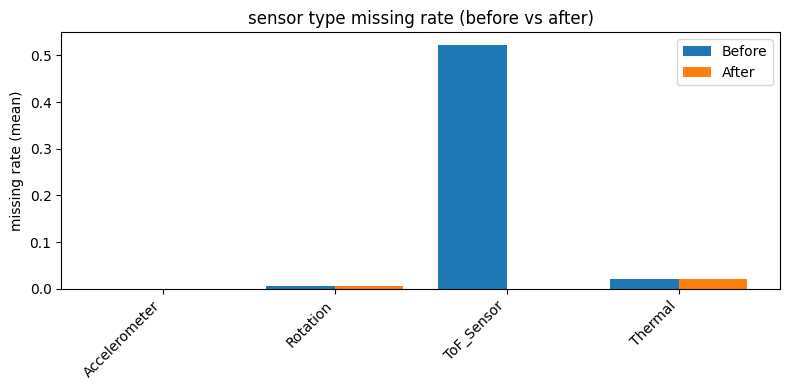

In [14]:
# „Çª„É´AÔºö„Çª„É≥„Çµ„Éº„Çø„Ç§„ÉóÂà•Ê¨†ÊêçÁéá before/after „Éê„Éº„Éó„É≠„ÉÉ„Éà
import matplotlib.pyplot as plt

# sensor_type_groups „ÅØÂâç„Çª„É´ÂÆöÁæ©Ê∏à„Åø
missing_before = {stype: train_cleaned_new[cols].isna().mean().mean()
                  for stype, cols in sensor_type_groups.items()}
missing_after  = {stype: train_final_new [cols].isna().mean().mean()
                  for stype, cols in sensor_type_groups.items()}

types = list(missing_before.keys())
before_vals = [missing_before[t] for t in types]
after_vals  = [missing_after[t]  for t in types]
x = range(len(types))

plt.figure(figsize=(8,4))
plt.bar([i-0.2 for i in x], before_vals, width=0.4, label='Before')
plt.bar([i+0.2 for i in x], after_vals,  width=0.4, label='After')
plt.xticks(x, types, rotation=45, ha='right')
plt.ylabel('missing rate (mean)')
plt.title('sensor type missing rate (before vs after)')
plt.legend()
plt.tight_layout()
plt.show()


ÂèØË¶ñÂåñÂØæË±°„Ç´„É©„É†: ['tof_5_v55', 'tof_5_v47', 'tof_5_v39']
‰ª£Ë°®„Ç∑„Éº„Ç±„É≥„ÇπID: SEQ_014205


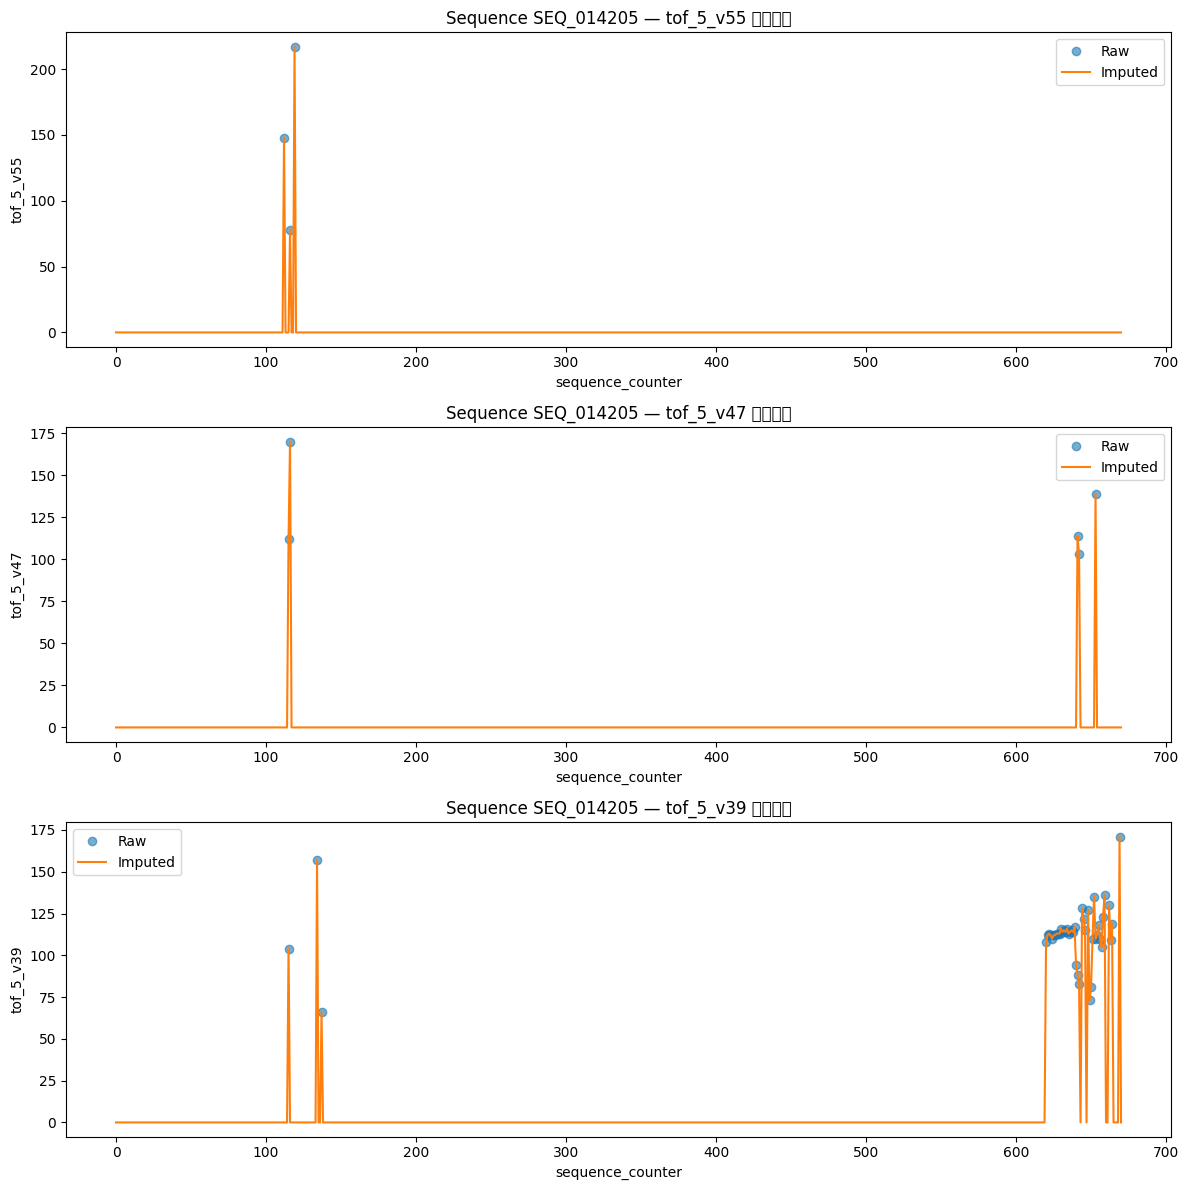

In [15]:
# „Çª„É´BÔºöË£úÈñìÂäπÊûú„Éà„ÉÉ„Éó„ÅÆ„Ç´„É©„É†„ÇíËá™ÂãïÈÅ∏Êäû„Åó„ÄÅ‰ª£Ë°®„Ç∑„Éº„Ç±„É≥„Çπ„Åß Raw vs Imputed „ÇíÂèØË¶ñÂåñ
import matplotlib.pyplot as plt

# 1) ÂêÑ„Ç´„É©„É†„ÅÆÊ¨†ÊêçÂâäÊ∏õÊï∞„ÇíË®àÁÆó
interp_cols = sum(sensor_type_groups.values(), [])
missing_before = train_cleaned_new[interp_cols].isna().sum()
missing_after  = train_final_new [interp_cols].isna().sum()
reduction      = (missing_before - missing_after).sort_values(ascending=False)

# 2) Ê¨†ÊêçÂâäÊ∏õ„Åå„ÅÇ„Å£„Åü‰∏ä‰Ωç3„Ç´„É©„É†
top_cols = reduction[reduction > 0].head(3).index.tolist()
print("ÂèØË¶ñÂåñÂØæË±°„Ç´„É©„É†:", top_cols)

# 3) „Åù„Çå„Çâ„ÅÆ„Ç´„É©„É†„Å´ÊúÄ„ÇÇÊ¨†Êêç„Åå„ÅÇ„Å£„Åü„Ç∑„Éº„Ç±„É≥„ÇπID„ÇíÈÅ∏Êäû
seq_missing = train_cleaned_new.groupby('sequence_id')[top_cols] \
                 .apply(lambda df: df.isna().sum().sum())
seq_id = seq_missing.idxmax()
print("‰ª£Ë°®„Ç∑„Éº„Ç±„É≥„ÇπID:", seq_id)

# 4) „Éá„Éº„ÇøÊäΩÂá∫
mask = train_cleaned_new['sequence_id'] == seq_id
orig = train_cleaned_new.loc[mask]
imp  = train_final_new .loc[mask]

# 5) „Éó„É≠„ÉÉ„Éà
fig, axes = plt.subplots(len(top_cols), 1, figsize=(12, 4*len(top_cols)))
for i, col in enumerate(top_cols):
    axes[i].plot(orig['sequence_counter'], orig[col], 'o', alpha=0.6, label='Raw')
    axes[i].plot( imp['sequence_counter'],  imp[col], '-', label='Imputed')
    axes[i].set_title(f"Sequence {seq_id} ‚Äî {col} Ë£úÈñìÂâçÂæå")
    axes[i].set_xlabel('sequence_counter')
    axes[i].set_ylabel(col)
    axes[i].legend()
plt.tight_layout()
plt.show()


##6 IMU„ÉØ„Éº„É´„ÉâÂ∫ßÊ®ôÁ≥ªÂ§âÊèõ


In [16]:
# „Çª„É´D-1: IMU world-frame Â§âÊèõÔºãÁ∑öÂΩ¢Âä†ÈÄüÂ∫¶Ë®àÁÆó
import numpy as np
import pandas as pd
from src.utils.preprocessing import transform_world_frame_by_subject

# ÂâçÊèê: train_cleaned_new „Å´ acc_*/rot_* „Åå„ÅÇ„Çã
df = train_cleaned_new.copy()
# „Çª„É´D-2Ôºö„ÉØ„Éº„É´„ÉâÂ∫ßÊ®ôÂ§âÊèõ„ÅÆÂÆüË°åÔºÜ„Ç≠„É£„ÉÉ„Ç∑„É•Âà©Áî®
from pathlib import Path

CACHE_DIR = Path("cache")
TRAIN_CACHE = CACHE_DIR / "train_world.parquet"
TEST_CACHE  = CACHE_DIR / "test_world.parquet"

# ‚Äî Train ‚Äî
if TRAIN_CACHE.exists():
    print("‚úÖ Load cached train_world")
    train_world = pd.read_parquet(TRAIN_CACHE)
else:
    print("üåÄ Compute train_world")
    train_world = transform_world_frame_by_subject(
        df,
        cache_path=TRAIN_CACHE
    )
    print("üíæ Cached train_world ‚Üí", TRAIN_CACHE)

# ‚Äî Test ‚Äî
if TEST_CACHE.exists():
    print("‚úÖ Load cached test_world")
    test_world = pd.read_parquet(TEST_CACHE)
else:
    print("üåÄ Compute test_world")
    test_world = transform_world_frame_by_subject(
        test_cleaned_new,
        cache_path=TEST_CACHE,
    )
    print("üíæ Cached test_world ‚Üí", TEST_CACHE)


‚úÖ Load cached train_world
‚úÖ Load cached test_world


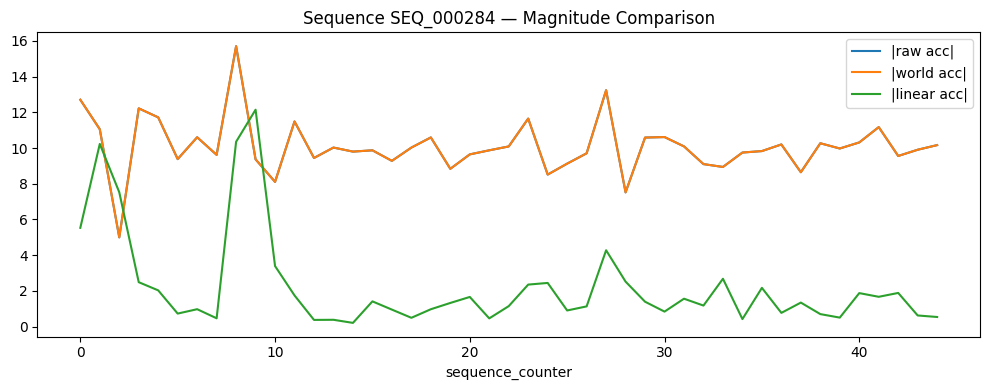

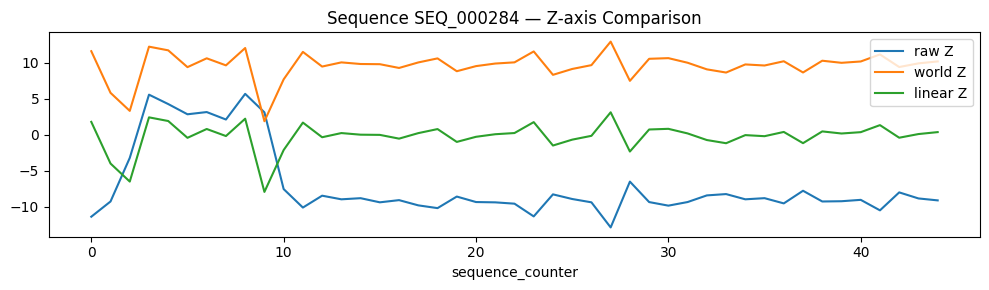

In [17]:
# „Çª„É´D-2: Â§âÊèõ„ÅÆÁ¢∫Ë™çÂèØË¶ñÂåñ
import matplotlib.pyplot as plt

# ‰ª£Ë°®„Ç∑„Éº„Ç±„É≥„Çπ„ÇíÊäΩÂá∫
seq0 = train_world['sequence_id'].unique()[0]
mask = train_world['sequence_id']==seq0
subset = train_world[mask]
t = subset['sequence_counter']

# (1) Â§ß„Åç„ÅïÊØîËºÉ
mag_raw   = np.linalg.norm(subset[['acc_x','acc_y','acc_z']], axis=1)
mag_world = np.linalg.norm(subset[['acc_w_x','acc_w_y','acc_w_z']], axis=1)
mag_lin   = np.linalg.norm(subset[['lin_acc_x','lin_acc_y','lin_acc_z']], axis=1)

plt.figure(figsize=(10,4))
plt.plot(t, mag_raw,   label='|raw acc|')
plt.plot(t, mag_world, label='|world acc|')
plt.plot(t, mag_lin,   label='|linear acc|')
plt.title(f'Sequence {seq0} ‚Äî Magnitude Comparison')
plt.xlabel('sequence_counter')
plt.legend()
plt.tight_layout()
plt.show()

# (2) Ëª∏Âà•ÊØîËºÉ (Z Ëª∏‰æã)
plt.figure(figsize=(10,3))
plt.plot(t, subset['acc_z'],    label='raw Z')
plt.plot(t, subset['acc_w_z'],  label='world Z')
plt.plot(t, subset['lin_acc_z'],label='linear Z')
plt.title(f'Sequence {seq0} ‚Äî Z-axis Comparison')
plt.xlabel('sequence_counter')
plt.legend()
plt.tight_layout()
plt.show()


## 7 windowÂàÜÂâ≤

In [18]:
# „Çª„É´J-1: „Éë„Éá„Ç£„É≥„Ç∞‰ªò„Åç„Çπ„É©„Ç§„Éá„Ç£„É≥„Ç∞„Ç¶„Ç£„É≥„Éâ„Ç¶ÁîüÊàê + Áµ±Ë®àÁÆóÂá∫

import yaml
import numpy as np
import pandas as pd
from src.utils.preprocessing import create_sliding_windows_with_demographics

# 1) Ë®≠ÂÆöË™≠„ÅøËæº„Åø
with open("../config_v2.yaml", "r") as f:
    cfg = yaml.safe_load(f)

ws      = cfg["preprocessing"]["window_size"]
st      = cfg["preprocessing"]["stride"]
min_len = cfg["preprocessing"]["min_sequence_length"]
pv      = cfg["preprocessing"]["padding_value"]
sensor_cols       = cfg["sensor_cols"]
demographics_cols = cfg["demographics_cols"]

train_demographics = pd.read_csv('../data/train_demographics.csv')
train_demographics.drop(columns=['handedness'], inplace=True)
df = train_world.merge(train_demographics, on='subject', how='left')
print(df.columns.tolist())

# --- Èñ¢Êï∞Âëº„Å≥Âá∫„Åó ---
X_sensor_windows, X_demo_windows, y_windows, info = create_sliding_windows_with_demographics(
    df=df,
    window_size=ws,
    stride=st,
    sensor_cols=sensor_cols,
    demographics_cols=demographics_cols,
    min_sequence_length=min_len,
    padding_value=pv,
)

# --- Áµ±Ë®àË°®Á§∫ ---
info_df = pd.DataFrame(info)
total          = len(X_sensor_windows)
padded_counts  = info_df["padded"].value_counts()
gesture_counts = pd.Series(y_windows).value_counts()

print(f"Total windows: {total}")
print(f"Padded windows: {padded_counts.get(True,0)} ({padded_counts.get(True,0)/total:.1%})")
print("\nWindows per gesture:")
display(gesture_counts)


['row_id', 'sequence_type', 'sequence_id', 'sequence_counter', 'subject', 'orientation', 'behavior', 'phase', 'gesture', 'acc_x', 'acc_y', 'acc_z', 'rot_w', 'rot_x', 'rot_y', 'rot_z', 'thm_1', 'thm_2', 'thm_3', 'thm_4', 'thm_5', 'tof_1_v0', 'tof_1_v1', 'tof_1_v2', 'tof_1_v3', 'tof_1_v4', 'tof_1_v5', 'tof_1_v6', 'tof_1_v7', 'tof_1_v8', 'tof_1_v9', 'tof_1_v10', 'tof_1_v11', 'tof_1_v12', 'tof_1_v13', 'tof_1_v14', 'tof_1_v15', 'tof_1_v16', 'tof_1_v17', 'tof_1_v18', 'tof_1_v19', 'tof_1_v20', 'tof_1_v21', 'tof_1_v22', 'tof_1_v23', 'tof_1_v24', 'tof_1_v25', 'tof_1_v26', 'tof_1_v27', 'tof_1_v28', 'tof_1_v29', 'tof_1_v30', 'tof_1_v31', 'tof_1_v32', 'tof_1_v33', 'tof_1_v34', 'tof_1_v35', 'tof_1_v36', 'tof_1_v37', 'tof_1_v38', 'tof_1_v39', 'tof_1_v40', 'tof_1_v41', 'tof_1_v42', 'tof_1_v43', 'tof_1_v44', 'tof_1_v45', 'tof_1_v46', 'tof_1_v47', 'tof_1_v48', 'tof_1_v49', 'tof_1_v50', 'tof_1_v51', 'tof_1_v52', 'tof_1_v53', 'tof_1_v54', 'tof_1_v55', 'tof_1_v56', 'tof_1_v57', 'tof_1_v58', 'tof_1_v59', '

Neck - scratch                                735
Text on phone                                 672
Eyebrow - pull hair                           657
Forehead - scratch                            643
Neck - pinch skin                             642
Cheek - pinch skin                            642
Eyelash - pull hair                           641
Forehead - pull hairline                      640
Above ear - pull hair                         638
Write name in air                             482
Wave hello                                    481
Pull air toward your face                     477
Feel around in tray and pull out an object    179
Glasses on/off                                166
Scratch knee/leg skin                         165
Pinch knee/leg skin                           161
Write name on leg                             161
Drink from bottle/cup                         161
Name: count, dtype: int64

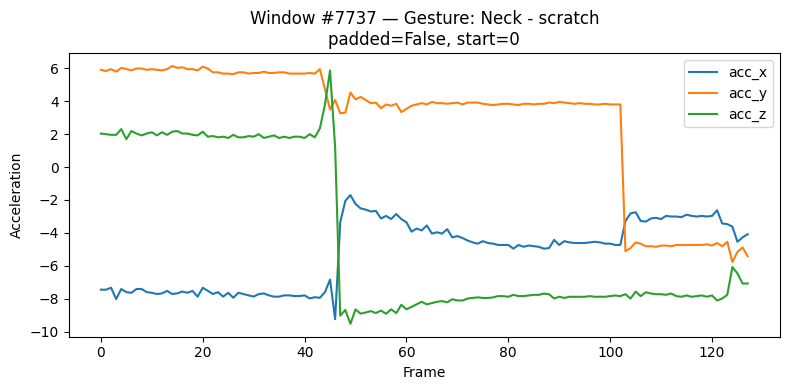

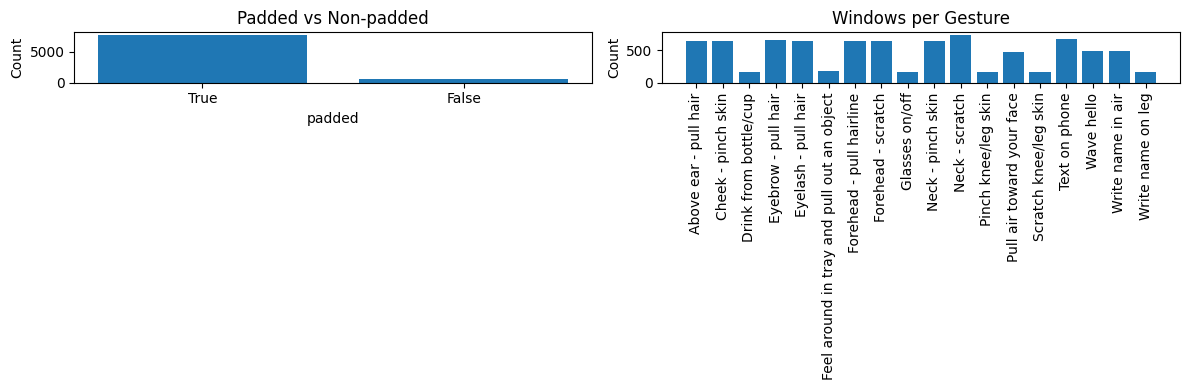

In [19]:
# „Çª„É´J-2: „Çµ„É≥„Éó„É´„Ç¶„Ç£„É≥„Éâ„Ç¶ÂèØË¶ñÂåñ + Áµ±Ë®à„Ç∞„É©„Éï

import numpy as np
import matplotlib.pyplot as plt
import random

idx   = random.randrange(total)
win   = X_sensor_windows[idx]
label = y_windows[idx]
pad   = info_df.loc[idx,"padded"]
start = info_df.loc[idx,"start_idx"]
t     = np.arange(win.shape[0])

# (1) „Çª„É≥„Çµ„ÉºÂä†ÈÄüÂ∫¶ X/Y/Z „ÅÆÊôÇÁ≥ªÂàó
plt.figure(figsize=(8,4))
for ax_col in ["acc_x","acc_y","acc_z"]:
    plt.plot(t, win[:, sensor_cols.index(ax_col)], label=ax_col)
plt.title(f"Window #{idx} ‚Äî Gesture: {label}\npadded={pad}, start={start}")
plt.xlabel("Frame")
plt.ylabel("Acceleration")
plt.legend()
plt.tight_layout()
plt.show()

# (2) „Éë„Éá„Ç£„É≥„Ç∞ÊØîÁéá & „Ç∏„Çß„Çπ„ÉÅ„É£„ÉºÂàÜÂ∏É
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
ax1.bar(padded_counts.index.astype(str), padded_counts.values)
ax1.set_title("Padded vs Non-padded")
ax1.set_xlabel("padded")
ax1.set_ylabel("Count")

gc = gesture_counts.sort_index()
ax2.bar(gc.index, gc.values)
ax2.set_title("Windows per Gesture")
ax2.set_xticklabels(gc.index, rotation=90)
ax2.set_ylabel("Count")

plt.tight_layout()
plt.show()


## 8 Ê≠£Ë¶èÂåñ



In [25]:
# „Çª„É´ C-3: Ê≠£Ë¶èÂåñ„ÅÆÂÆüË°å
import numpy as np
from src.utils.preprocessing import normalize_sensor_data, normalize_tabular_data

# „Çª„É´ C-5: ÂâçÂá¶ÁêÜÊÉÖÂ†±„ÅÆ‰øùÂ≠ò
import joblib
import yaml

# 1) Ê≠£Ë¶èÂåñ ‚Üí „Çª„É≥„Çµ„Éº„Éª„Éá„É¢ÂèåÊñπ„ÅÆ„Çπ„Ç±„Éº„É©„ÇíÁîüÊàê
X_sensor_norm, sensor_scaler = normalize_sensor_data(X_sensor_windows)
X_demo_norm,   demo_scaler   = normalize_tabular_data(X_demo_windows)

# 2) „Çπ„Ç±„Éº„É©„Çí„Éá„Ç£„Çπ„ÇØ„Å´‰øùÂ≠ò
joblib.dump(sensor_scaler, "../models/sensor_scaler.pkl")
joblib.dump(demo_scaler,   "../models/demo_scaler.pkl")

# 3) config_v2.yaml „Åã„Çâ‰Ωø„Å£„Åü„Ç´„É©„É†„É™„Çπ„Éà„ÇíÊäú„ÅçÂá∫„Åó„Å¶‰øùÂ≠ò
with open("../config_v2.yaml", "r") as f:
    cfg = yaml.safe_load(f)

preproc_info = {
    "sensor_cols":       cfg["sensor_cols"],
    "demographics_cols": cfg["demographics_cols"],
    "window_size":       cfg["preprocessing"]["window_size"],
    "stride":            cfg["preprocessing"]["stride"],
    "min_sequence_length": cfg["preprocessing"]["min_sequence_length"],
    "padding_value":     cfg["preprocessing"]["padding_value"],
}

with open("../models/preproc_info.yaml", "w") as f:
    yaml.safe_dump(preproc_info, f)


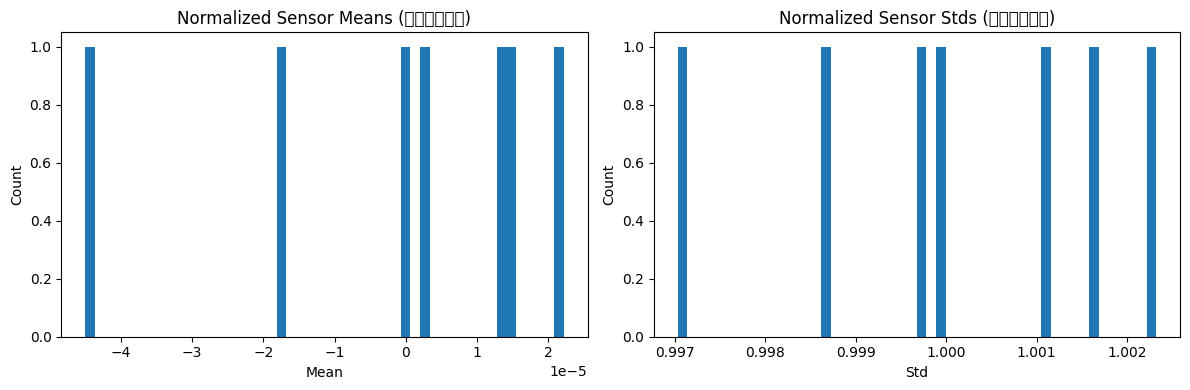

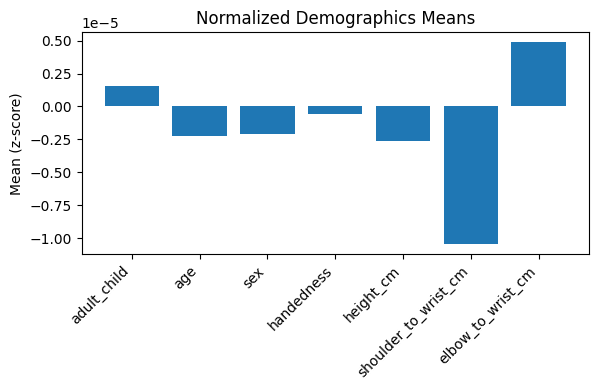

In [ ]:
# „Çª„É´ C-4: Ê≠£Ë¶èÂåñÂæå„ÅÆÂàÜÂ∏ÉÂèØË¶ñÂåñ
import matplotlib.pyplot as plt

# --- „Çª„É≥„Çµ„ÉºÁâπÂæ¥Èáè„Åî„Å®„ÅÆÂπ≥Âùá„ÉªÊ®ôÊ∫ñÂÅèÂ∑Æ„Éí„Çπ„Éà„Ç∞„É©„É† ---
n_windows, window_size, n_features = X_sensor_norm.shape
X_flat = X_sensor_norm.reshape(-1, n_features)

means = X_flat.mean(axis=0)
stds  = X_flat.std(axis=0)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.hist(means, bins=50)
plt.title("Normalized Sensor Means (ÂÖ®„Ç¶„Ç£„É≥„Éâ„Ç¶)")
plt.xlabel("Mean")
plt.ylabel("Count")

plt.subplot(1,2,2)
plt.hist(stds, bins=50)
plt.title("Normalized Sensor Stds (ÂÖ®„Ç¶„Ç£„É≥„Éâ„Ç¶)")
plt.xlabel("Std")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# --- „Éá„É¢„Ç∞„É©„Éï„Ç£„ÉÉ„ÇØÁâπÂæ¥Èáè„ÅÆÂπ≥Âùá„Éó„É≠„ÉÉ„Éà ---
feature_names = demographics_cols  # config_v2.yaml „Åã„ÇâË™≠„ÅøËæº„Çì„Å†„É™„Çπ„Éà
demo_means = X_demo_norm.mean(axis=0)

plt.figure(figsize=(6,4))
plt.bar(feature_names, demo_means)
plt.xticks(rotation=45, ha="right")
plt.title("Normalized Demographics Means")
plt.ylabel("Mean (z-score)")
plt.tight_layout()
plt.show()


In [27]:
# „Çª„É´ C-6: ÂâçÂæåÁµ±Ë®àÊØîËºÉÔºà„Çª„É≥„Çµ„Éº„Éª„Éá„É¢ÂèåÊñπÔºâ
import numpy as np
import pandas as pd

# --- „Çª„É≥„Çµ„ÉºÁâπÂæ¥Èáè„ÅÆÁµ±Ë®àÊØîËºÉ ---
# ÂΩ¢Áä∂: (n_windows, window_size, n_features)
n, t, f = X_sensor_windows.shape

# ÂâçÂá¶ÁêÜÂâç„ÅÆ„Éï„É©„ÉÉ„Éà„Éá„Éº„Çø
orig_flat = np.nan_to_num(
    X_sensor_windows.reshape(-1, f),
    nan=0.0
)
# ÂâçÂá¶ÁêÜÂæå„ÅÆ„Éï„É©„ÉÉ„Éà„Éá„Éº„Çø
norm_flat = X_sensor_norm.reshape(-1, f)

sensor_stats = pd.DataFrame({
    "mean_before": orig_flat.mean(axis=0),
    "std_before":  orig_flat.std(axis=0),
    "mean_after":  norm_flat.mean(axis=0),
    "std_after":   norm_flat.std(axis=0),
}, index=sensor_cols)

# --- „Éá„É¢„Ç∞„É©„Éï„Ç£„ÉÉ„ÇØÁâπÂæ¥Èáè„ÅÆÁµ±Ë®àÊØîËºÉ ---
# ÂΩ¢Áä∂: (n_windows, n_demo_features)
demo_stats = pd.DataFrame({
    "mean_before": X_demo_windows.mean(axis=0),
    "std_before":  X_demo_windows.std(axis=0),
    "mean_after":  X_demo_norm.mean(axis=0),
    "std_after":   X_demo_norm.std(axis=0),
}, index=demographics_cols)

# ÁµêÊûú„ÇíË°®Á§∫
print("=== Sensor Features Statistics ===")
display(sensor_stats)

print("\n=== Demographics Features Statistics ===")
display(demo_stats)


=== Sensor Features Statistics ===


mean_before  std_before    mean_after  std_after
acc_x     0.911561    4.317984  2.218505e-05   1.001075
acc_y     0.634967    3.817926 -4.502775e-05   0.997032
acc_z    -0.066870    4.516613  3.288996e-06   0.999900
rot_w     0.195556    0.246609  1.337117e-05   0.998624
rot_x    -0.065800    0.346055  1.421968e-05   1.002319
rot_y    -0.009430    0.396306 -1.765192e-05   0.999740
rot_z    -0.078716    0.388933  4.511828e-07   1.001606


=== Demographics Features Statistics ===


mean_before  std_before    mean_after  std_after
adult_child              0.521515    0.499547  1.547535e-06   0.999981
age                     21.879900   10.311316 -2.249852e-06   1.000011
sex                      0.611650    0.487367 -2.094429e-06   0.999999
handedness               0.876184    0.329361 -5.649474e-07   0.999970
height_cm              167.830811   10.633737 -2.616946e-06   1.000018
shoulder_to_wrist_cm    51.510967    4.887759 -1.045521e-05   0.999998
elbow_to_wrist_cm       25.433537    3.000685  4.863447e-06   1.000003

## 9 VOX

